## Portfolio Assignment week 03

## Anomaly Detection Assignment



Study the notebook Study_Case_Anomoly_Detection

Choose at least 1 out of the listed assignments below

1. Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.

2. To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook.

3. Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose.

4. Try to find the best configuration for one of the tested algorithms

5. Try anomaly detection on a different dataset without timeseries data. Intrepret the results

Do not forget to reference sources!

Data sorce:

https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

### Answer

1. The plot reveals that the Isolation Forest algorithm effectively pinpointed anomalies close to instances of machinery breakdown. This suggests the algorithm's ability to detect unusual patterns in the sensor data that might signify an impending machinery failure. Nevertheless, the algorithm also categorized certain points as anomalies even when the machinery was operating normally, indicating the presence of occasional false positives. In essence, the algorithm's capacity to detect genuine anomalies is demonstrated, but its tendency to occasionally misinterpret normal behavior as anomalous needs further refinement. This highlights the balance between sensitivity and specificity that anomaly detection algorithms need to achieve for optimal performance.

2. approaches for improving data quality in anomaly detection for time series data.

**Approach 1: Without Outlier Handling**

In this approach, you're focusing on data quality improvement by removing columns with missing values exceeding 30% and any duplicate rows. The code ensures that the 'timestamp' column is converted to the datetime format and set as the index. This approach addresses missing values and duplicates but does not specifically handle outliers.

**Approach 2: With Outlier Handling**

In this approach, you're performing similar data quality improvements by removing duplicates and columns with high missing percentages. Additionally, you're handling outliers using the Interquartile Range (IQR) method. For each column (except the last one, which appears to be a categorical 'machine_status'), you calculate the lower and upper bounds based on the IQR and exclude data points falling outside these bounds.

**Comparing the two approaches:**

Missing Values and Duplicates: Both approaches address missing values and duplicate rows, which are crucial steps in improving data quality for anomaly detection.

Outlier Handling: Approach 2 explicitly handles outliers using the IQR method, whereas Approach 1 does not. Handling outliers is essential for anomaly detection because anomalies are often outliers. Approach 2 is likely to retain more potential anomalies by considering points that deviate significantly from the majority of data.

Trade-off: Approach 2's outlier handling introduces a trade-off. While it retains more potential anomalies, it might also remove some genuine anomalies if they fall within the outlier bounds.

Resampling or Aggregation: The provided code doesn't include steps for resampling or aggregation, which can help reduce noise and emphasize higher-level patterns relevant for anomaly detection. Implementing these steps might further enhance the anomaly detection process.

In summary, Approach 2 with outlier handling is likely to yield better results for anomaly detection as it retains more potential anomalies by considering their deviation from the norm

3. The Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm is used for clustering and anomaly detection in datasets. Its primary function is to group together data points that are close to each other in a dense region while distinguishing data points in sparser regions as outliers or noise. DBSCAN defines clusters based on a minimum number of neighboring points within a specified distance radius. It forms clusters by expanding around core points and encompassing border points, while data points that do not satisfy the criteria remain unclustered and are marked as anomalies or noise. This approach is particularly effective for datasets with irregular shapes and varying densities, making it valuable for identifying meaningful structures while highlighting outlier.the result of this algorithm was not as good as LOF.

**Reference:** 1.https://stackabuse.com/dbscan-with-scikit-learn-in-python/
               2. https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

**More imformation:**
Shiva and i worked together



In [2]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

## libraries


In [5]:


# Read CSV data into a pandas DataFrame
df = pd.read_csv('D:/Data Science Class/Data science 3/my/data/sensor.csv')

# Display the first 10 rows of the DataFrame
df.head(10)



Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   
5           5  2018-04-01 00:05:00   2.453588   47.09201    53.1684   
6           6  2018-04-01 00:06:00   2.455556   47.04861    53.1684   
7           7  2018-04-01 00:07:00   2.449653   47.13541    53.1684   
8           8  2018-04-01 00:08:00   2.463426   47.09201    53.1684   
9           9  2018-04-01 00:09:00   2.445718   47.17882    53.1684   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   
5  46.397568   637.6157   78.18568   13.41146   16.16753  ...   42.70833   
6  46.397568   633.3333   75.81614   13.43316   16.13136  ...   43.22916   
7  46.397568   630.6713   75.77331   13.25231   16.12413  ...   42.96875   
8  46.397568   631.9444   74.58916   13.28848   16.13136  ...   42.18750   
9  46.397568   641.7823   74.57428   13.38252   16.24711  ...   41.66666   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   
5  38.773150   63.65741   51.79398  38.773150   164.6412   66.55093   
6  38.194440   61.92130   51.79398  39.062500   171.8750   67.70834   
7  38.194443   59.60648   50.92593  39.351850   178.5301   68.57639   
8  38.194440   57.87037   50.63657  39.351850   182.0023   69.44444   
9  39.062500   56.42361   50.63657  39.062500   186.6319   69.73380   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  
5   241.6088   201.6782          NORMAL  
6   240.1620   200.2315          NORMAL  
7   241.3194   201.0995          NORMAL  
8   243.0556   201.6782          NORMAL  
9   246.5278   200.8102          NORMAL  

[10 rows x 55 columns]

In [ ]:
df.shape

(220320, 55)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [6]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

## cleaning the data

### outliers detection

In [8]:
def without_outlier_Handling(df_sensor):
    # Convert 'timestamp' column to datetime format
    df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])
    
    # Set 'timestamp' column as the index
    df_sensor = df_sensor.set_index('timestamp')
    
    # Calculate the missing percentage using the isna method
    missing_value = df_sensor.isna().mean() * 100
    
    # Get the column names with missing percentage greater than 30%
    low_value = missing_value[missing_value > 30].index.tolist()
    
    # Drop columns with high missing percentage
    df_sensor = df_sensor.drop(low_value, axis=1)
    
    # Drop the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df_sensor.columns:
        df_sensor = df_sensor.drop('Unnamed: 0', axis=1)
    
    # Return the cleaned DataFrame
    return df_sensor


In [17]:
def with_outlier_Handling(df_sensor):
    # Remove duplicate rows
    df_sensor = df_sensor.drop_duplicates()
    
    # Convert 'timestamp' column to datetime format
    df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])
    
    # Set 'timestamp' column as the index
    df_sensor = df_sensor.set_index('timestamp')
    
    # Calculate the percentage of missing values for each column
    missing_value = df_sensor.isna().mean() * 100
    
    # Get the column names with missing percentage greater than 30%
    low_value = missing_value[missing_value > 30].index.tolist()
    
    # Drop columns with high missing percentage
    df_sensor = df_sensor.drop( low_value, axis=1)
    
    # Drop the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df_sensor.columns:
        df_sensor = df_sensor.drop('Unnamed: 0', axis=1)
    
    # Outlier management
    for c in df_sensor.columns[:-1]:
        Q1 = df_sensor[c].quantile(0.25)
        Q3 = df_sensor[c].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_sensor = df_sensor.loc[(df_sensor[c] > lower) & (df_sensor[c] < upper)]
    
    # Return the cleaned DataFrame
    return df_sensor


 ### Exploratory Data Analysis


In [18]:
without_outlier = without_outlier_Handling(df)
with_outlier= with_outlier_Handling(df)
print(df.shape)
df.describe().T

(220320, 55)


count           mean           std        min           25%  \
Unnamed: 0  220320.0  110159.500000  63601.049991   0.000000  55079.750000   
sensor_00   210112.0       2.372221      0.412227   0.000000      2.438831   
sensor_01   219951.0      47.591611      3.296666   0.000000     46.310760   
sensor_02   220301.0      50.867392      3.666820  33.159720     50.390620   
sensor_03   220301.0      43.752481      2.418887  31.640620     42.838539   
sensor_04   220301.0     590.673936    144.023912   2.798032    626.620400   
sensor_05   220301.0      73.396414     17.298247   0.000000     69.976260   
sensor_06   215522.0      13.501537      2.163736   0.014468     13.346350   
sensor_07   214869.0      15.843152      2.201155   0.000000     15.907120   
sensor_08   215213.0      15.200721      2.037390   0.028935     15.183740   
sensor_09   215725.0      14.799210      2.091963   0.000000     15.053530   
sensor_10   220301.0      41.470339     12.093519   0.000000     40.705260   
sensor_11   220301.0      41.918319     13.056425   0.000000     38.856420   
sensor_12   220301.0      29.136975     10.113935   0.000000     28.686810   
sensor_13   220301.0       7.078858      6.901755   0.000000      1.538516   
sensor_14   220299.0     376.860041    113.206382  32.409550    418.103250   
sensor_15        0.0            NaN           NaN        NaN           NaN   
sensor_16   220289.0     416.472892    126.072642   0.000000    459.453400   
sensor_17   220274.0     421.127517    129.156175   0.000000    454.138825   
sensor_18   220274.0       2.303785      0.765883   0.000000      2.447542   
sensor_19   220304.0     590.829775    199.345820   0.000000    662.768975   
sensor_20   220304.0     360.805165    101.974118   0.000000    398.021500   
sensor_21   220304.0     796.225942    226.679317  95.527660    875.464400   
sensor_22   220279.0     459.792815    154.528337   0.000000    478.962600   
sensor_23   220304.0     922.609264    291.835280   0.000000    950.922400   
sensor_24   220304.0     556.235397    182.297979   0.000000    601.151050   
sensor_25   220284.0     649.144799    220.865166   0.000000    693.957800   
sensor_26   220300.0     786.411781    246.663608  43.154790    790.489575   
sensor_27   220304.0     501.506589    169.823173   0.000000    448.297950   
sensor_28   220304.0     851.690339    313.074032   4.319347    782.682625   
sensor_29   220248.0     576.195305    225.764091   0.636574    518.947225   
sensor_30   220059.0     614.596442    195.726872   0.000000    627.777800   
sensor_31   220304.0     863.323100    283.544760  23.958330    839.062400   
sensor_32   220252.0     804.283915    260.602361   0.240716    760.607475   
sensor_33   220304.0     486.405980    150.751836   6.460602    489.761075   
sensor_34   220304.0     234.971776     88.376065  54.882370    172.486300   
sensor_35   220304.0     427.129817    141.772519   0.000000    353.176625   
sensor_36   220304.0     593.033876    289.385511   2.260970    288.547575   
sensor_37   220304.0      60.787360     37.604883   0.000000     28.799220   
sensor_38   220293.0      49.655946     10.540397  24.479166     45.572910   
sensor_39   220293.0      36.610444     15.613723  19.270830     32.552080   
sensor_40   220293.0      68.844530     21.371139  23.437500     57.812500   
sensor_41   220293.0      35.365126      7.898665  20.833330     32.552080   
sensor_42   220293.0      35.453455     10.259521  22.135416     32.812500   
sensor_43   220293.0      43.879591     11.044404  24.479166     39.583330   
sensor_44   220293.0      42.656877     11.576355  25.752316     36.747684   
sensor_45   220293.0      43.094984     12.837520  26.331018     36.747684   
sensor_46   220293.0      48.018585     15.641284  26.331018     40.509258   
sensor_47   220293.0      44.340903     10.442437  27.199070     39.062500   
sensor_48   220293.0     150.889044     82.244957  26.331018     83.912030   
sensor_49   220293.0      57.119968  

In [ ]:
broken = without_outlier[without_outlier['machine_status'] == 'BROKEN']
recovery = without_outlier[without_outlier['machine_status'] == 'RECOVERING']
normal = without_outlier[without_outlier['machine_status'] == 'NORMAL']
pd.options.display.max_rows = 4000

def plot_sensor(sensor):
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(25, 3))
    
    # Plot the 'RECOVERING' data points
    ax.plot(recovery[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='RECOVERING')
    
    # Plot the overall data
    ax.plot(df[sensor], color='grey', label='Overall')
    
    # Plot the 'BROKEN' data points
    ax.plot(broken[sensor], linestyle='none', marker='X', color='red', markersize=14, label='BROKEN')
    
    # Set the title of the plot
    ax.set_title(sensor)
    
    # Add a legend
    ax.legend()
    
    # Display the plot
    plt.show()


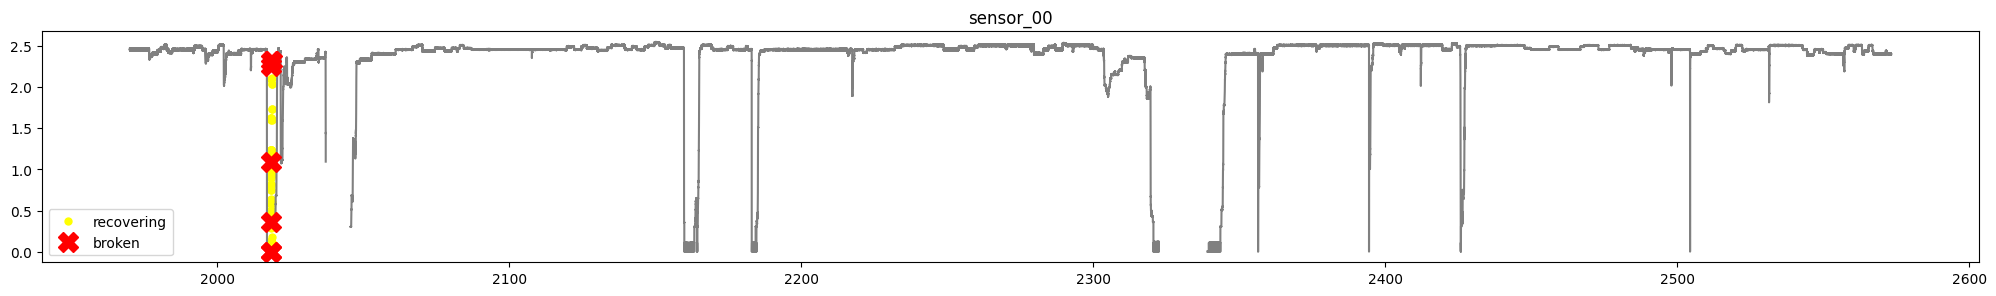

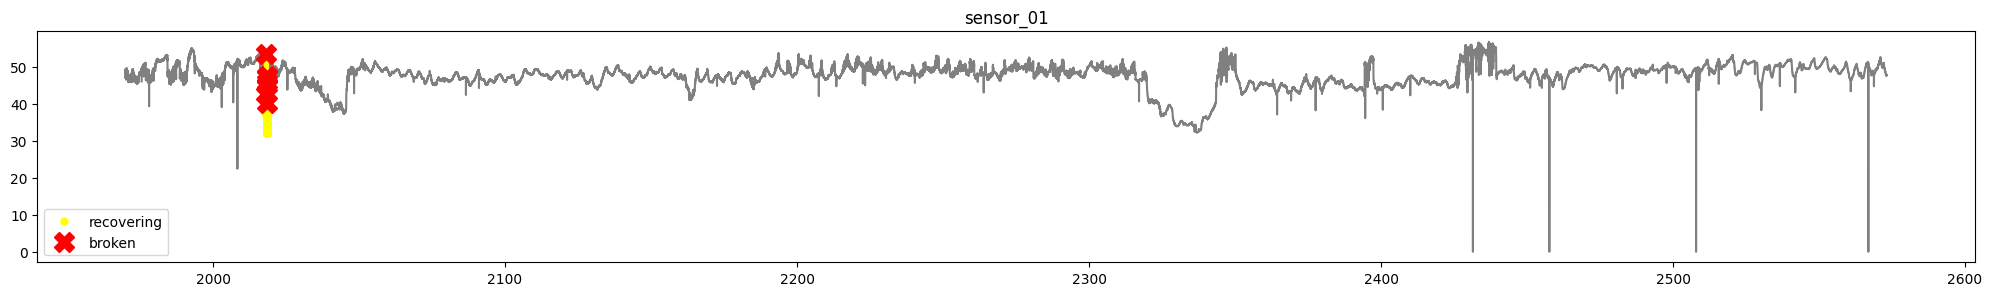

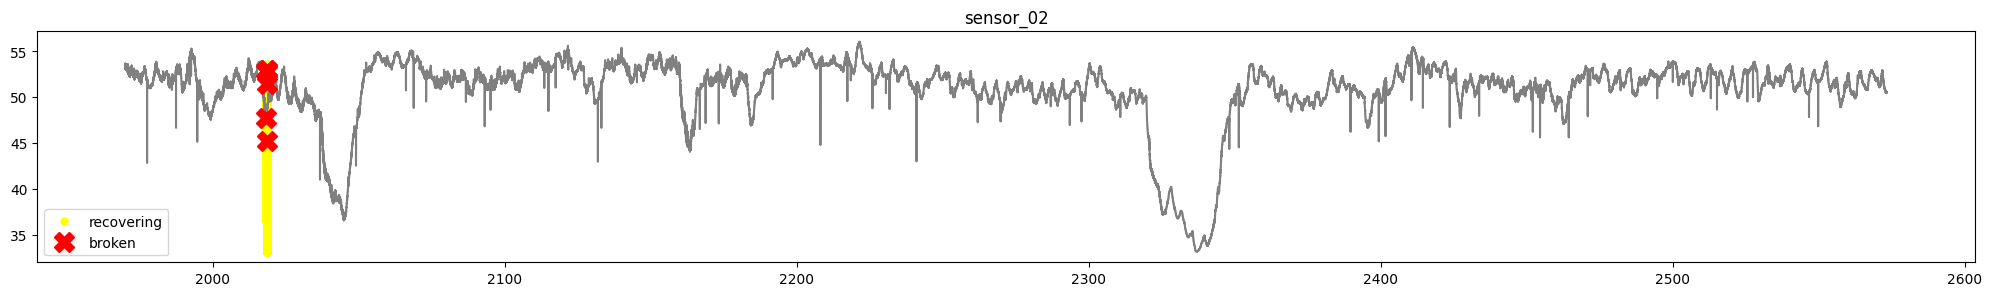

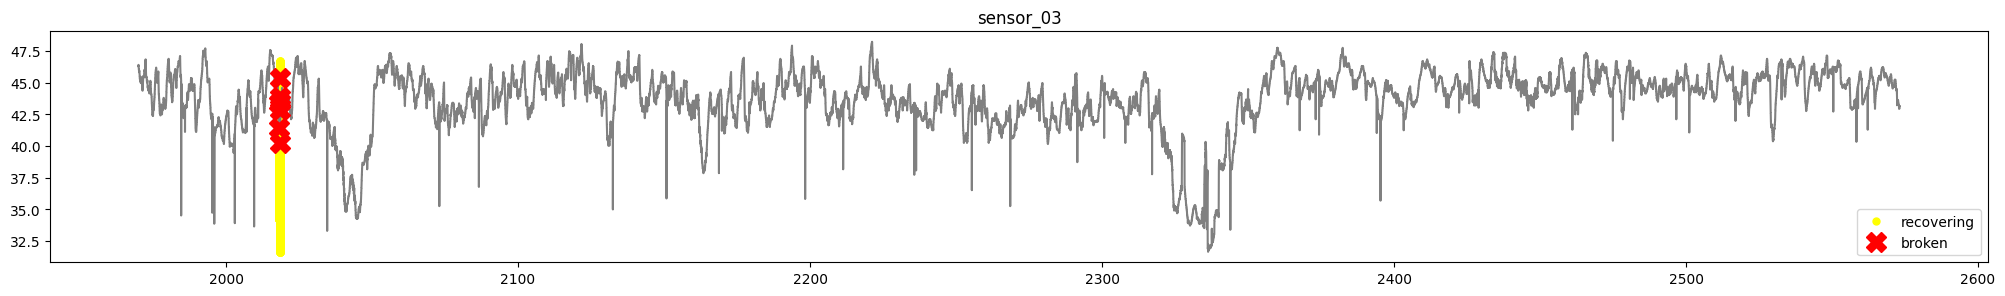

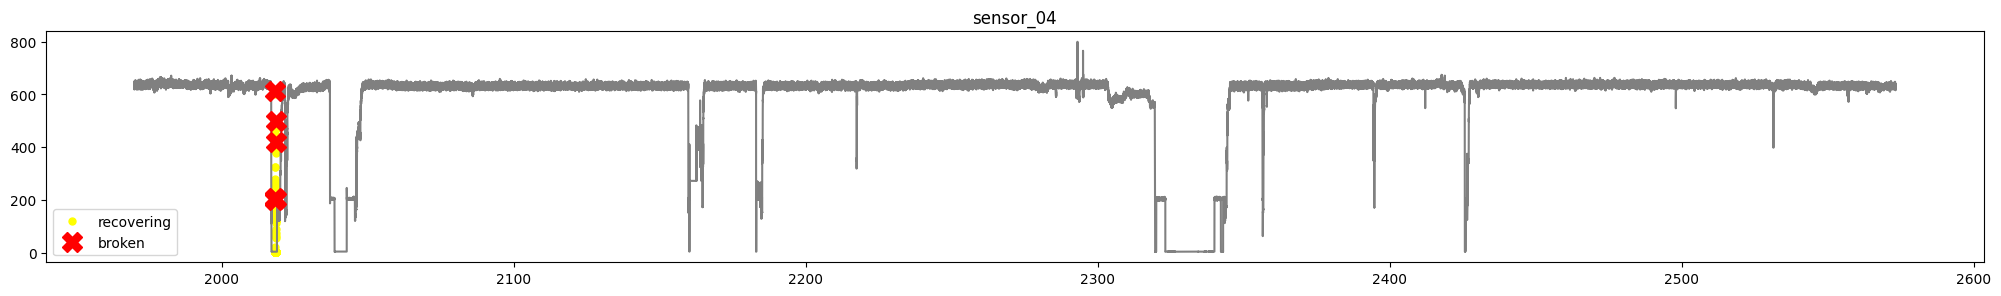

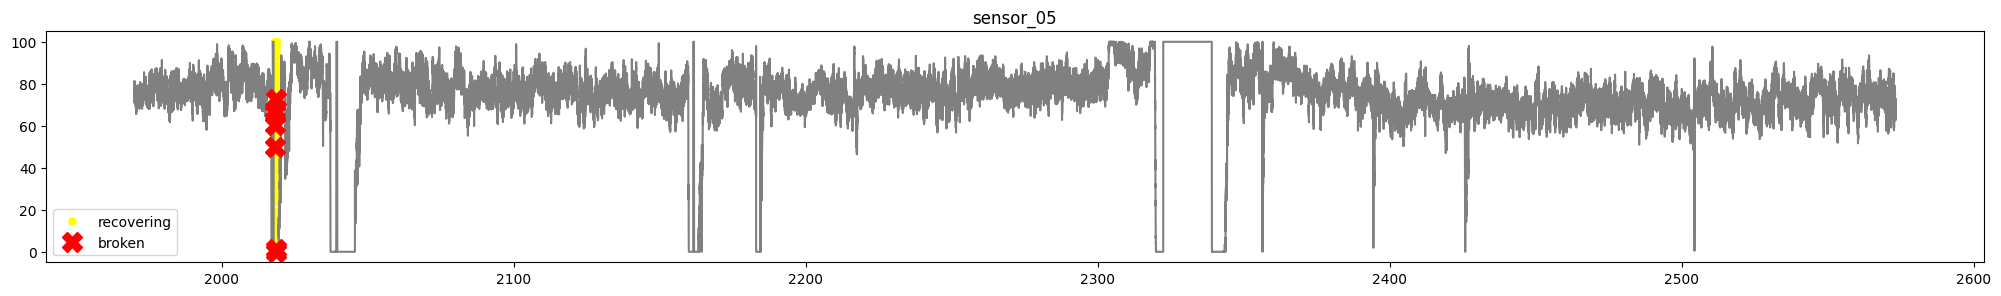

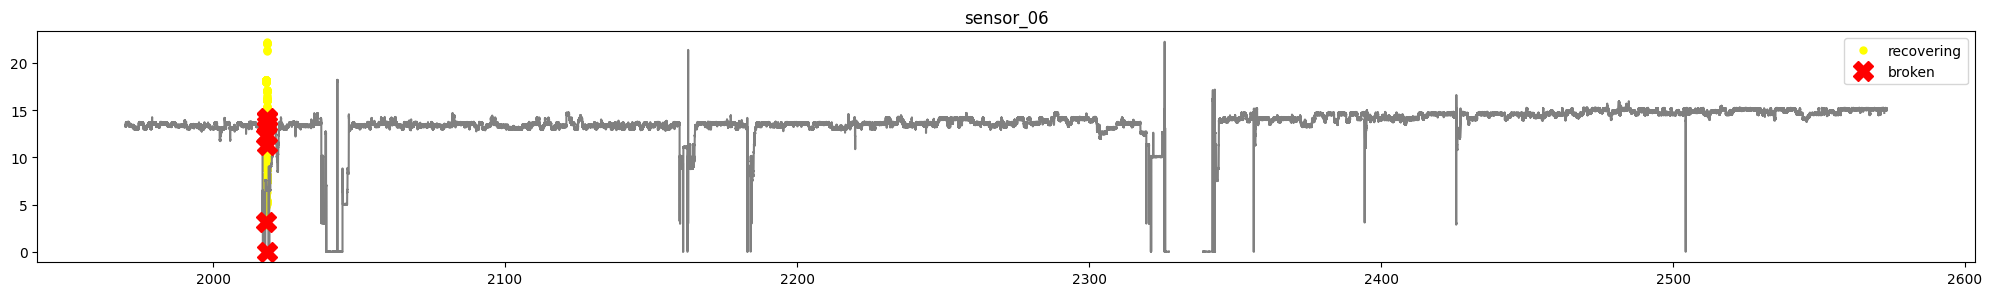

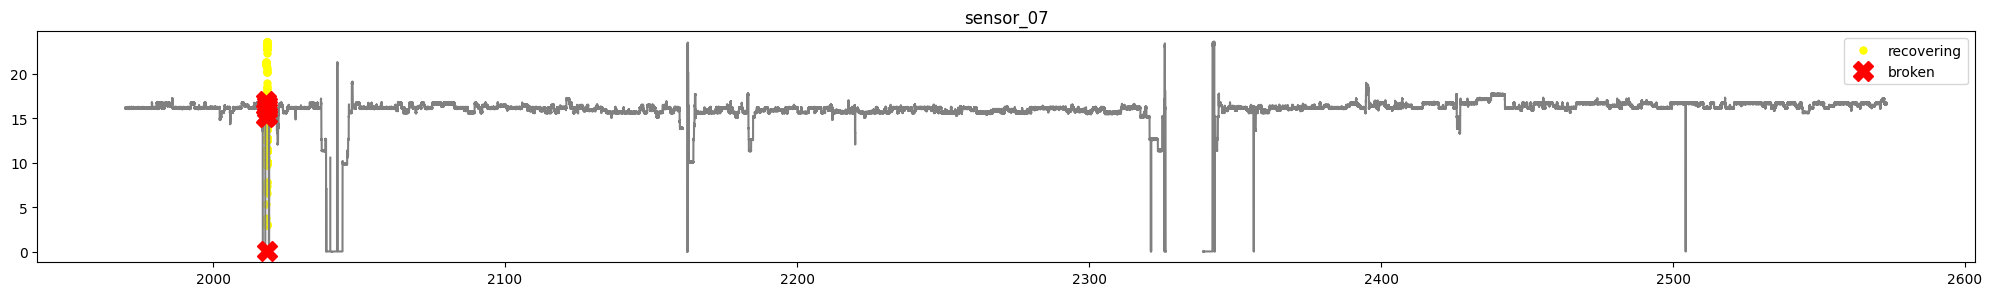

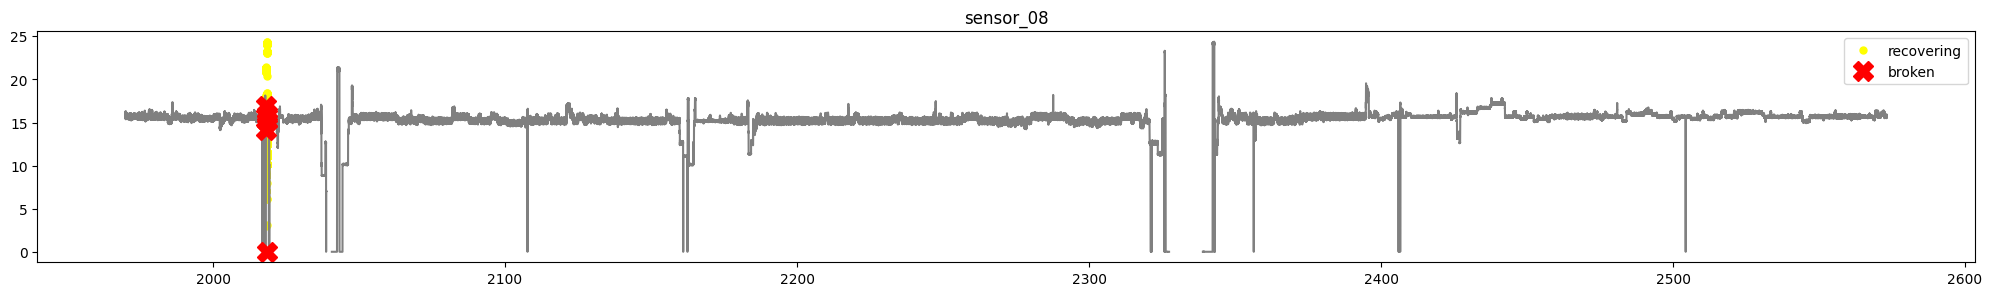

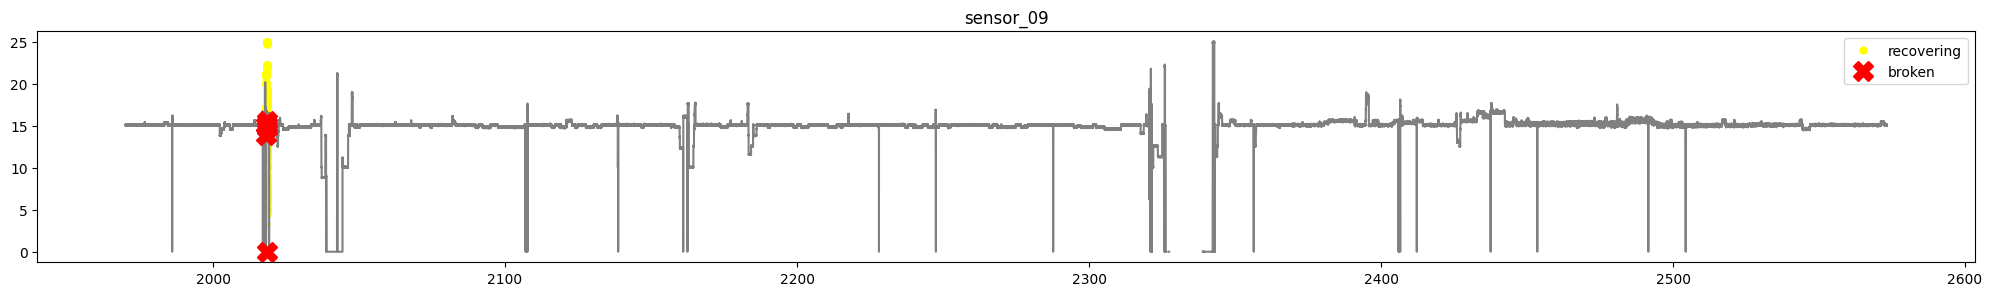

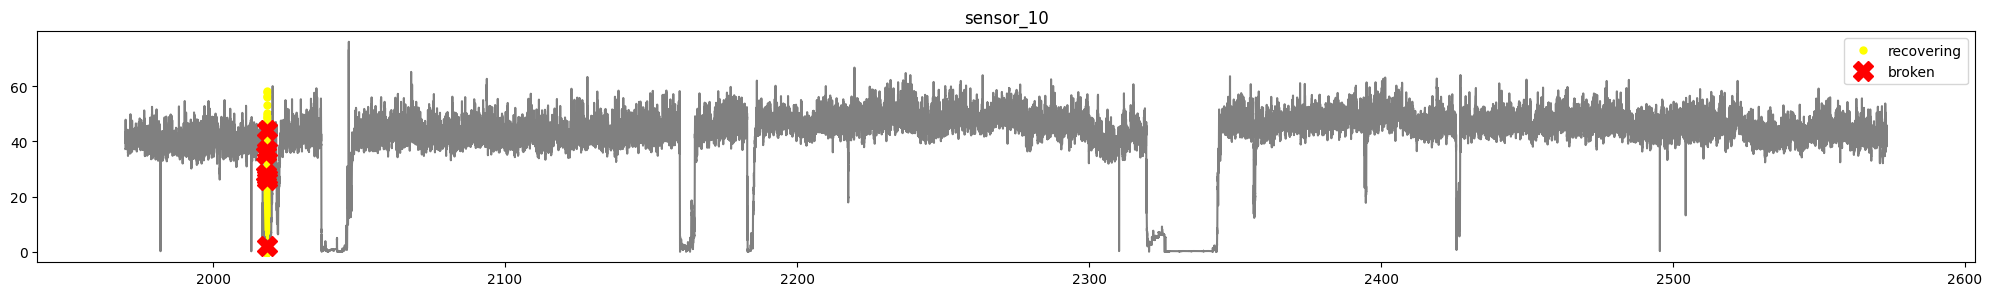

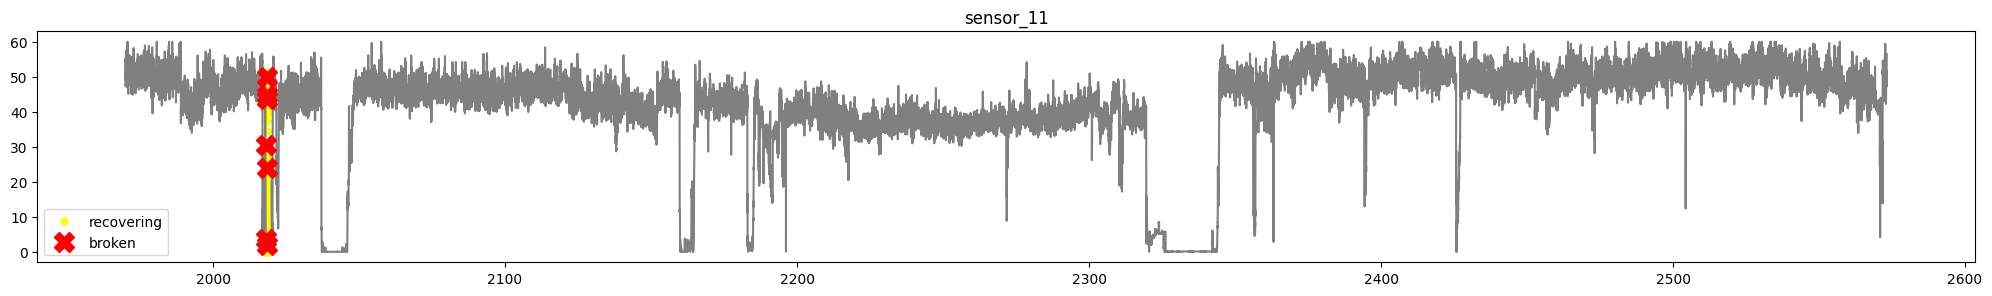

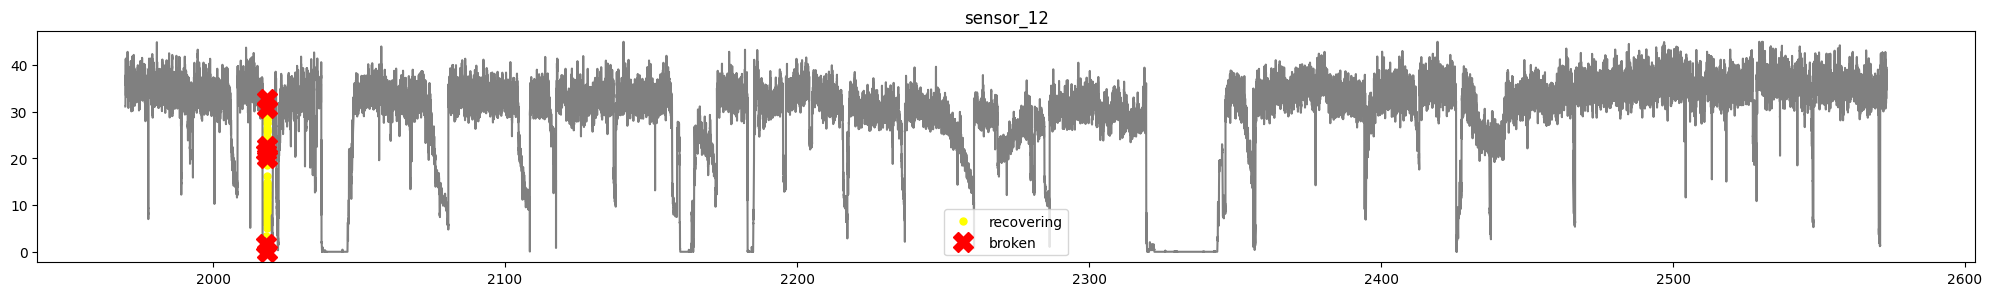

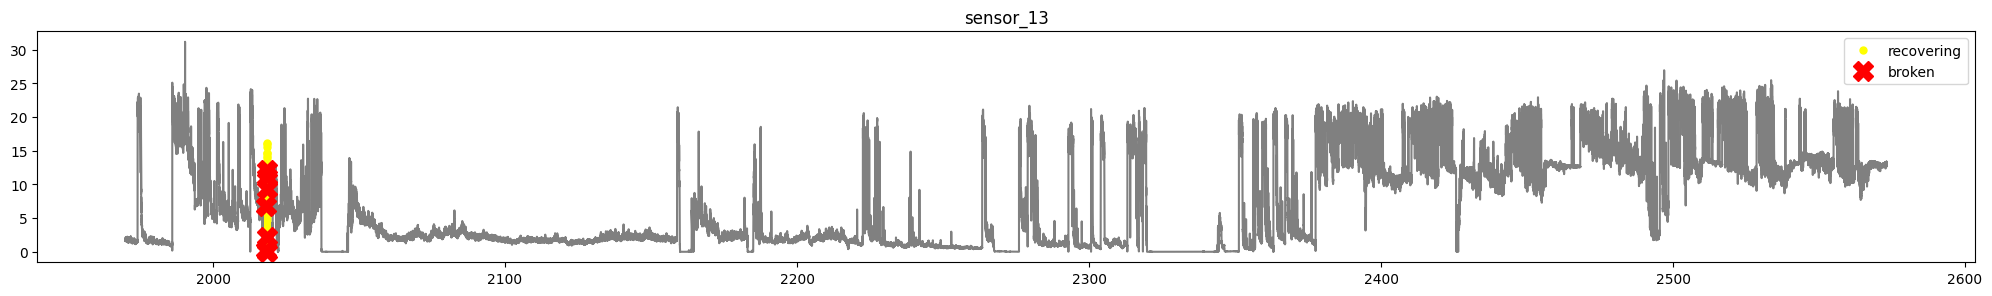

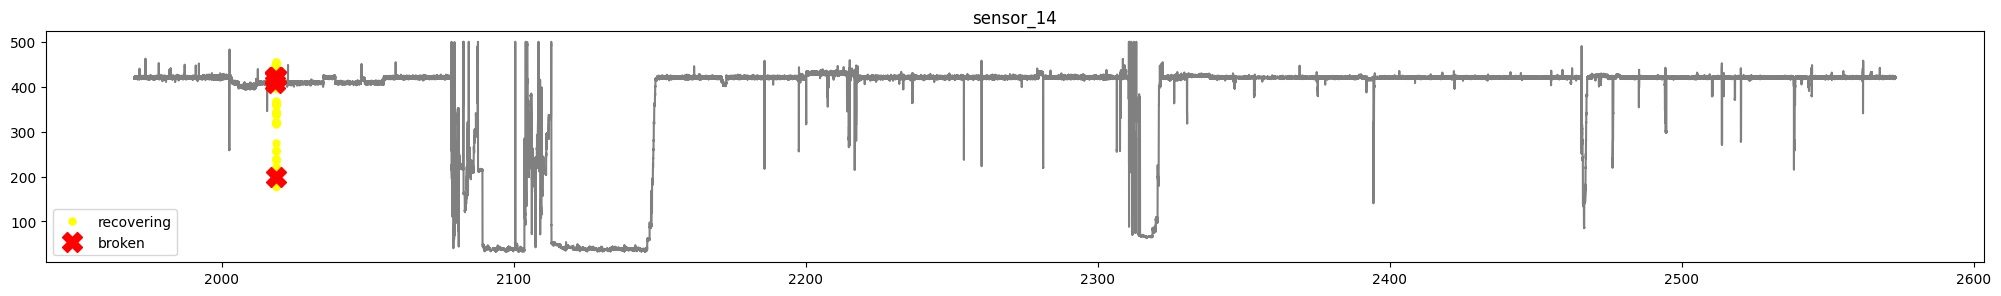

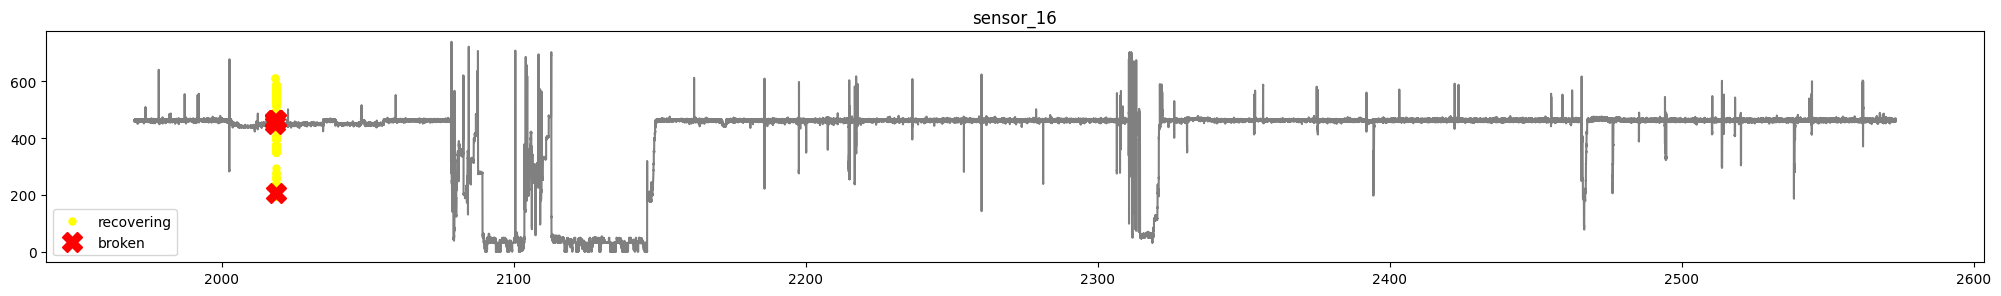

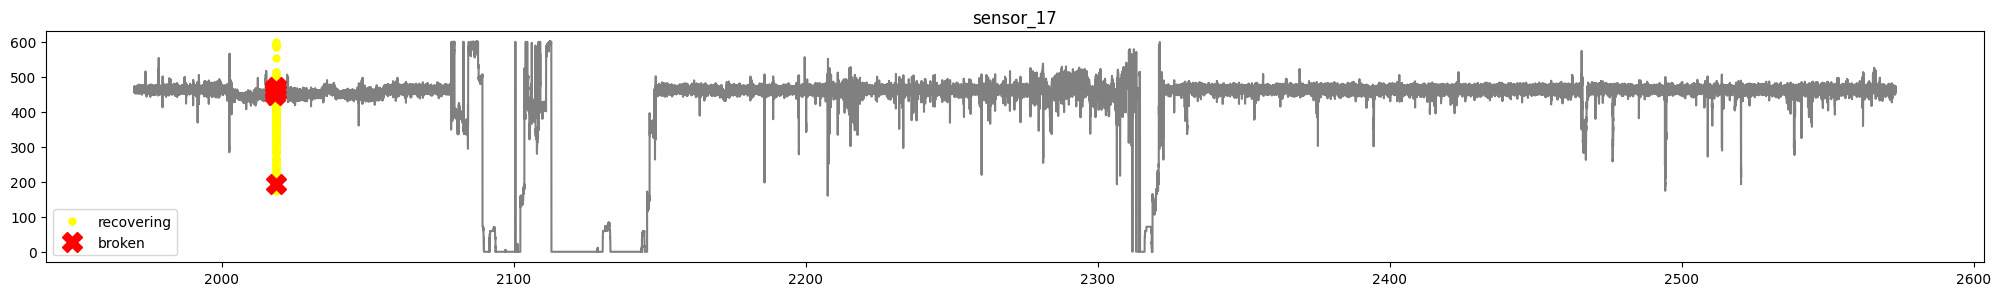

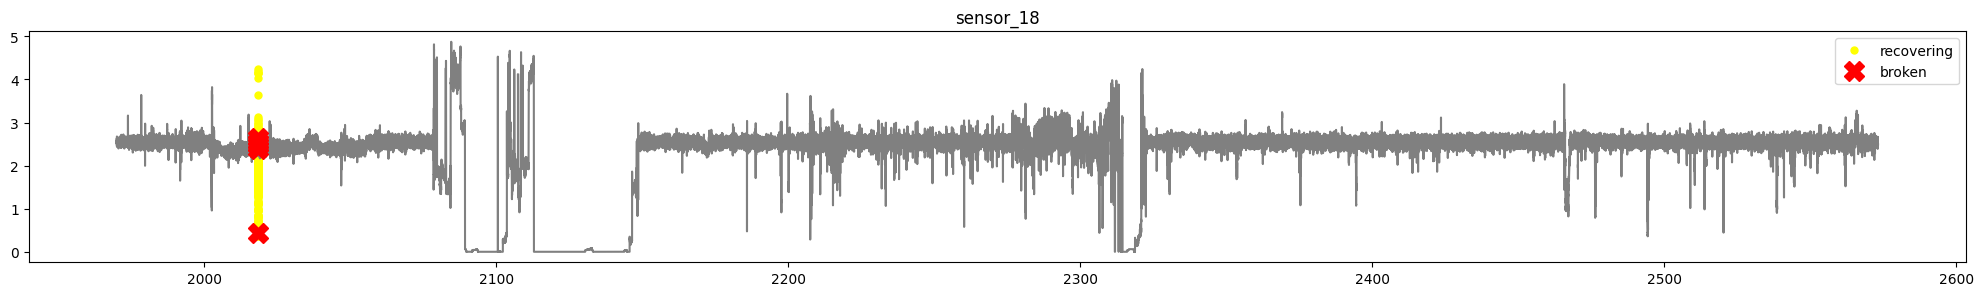

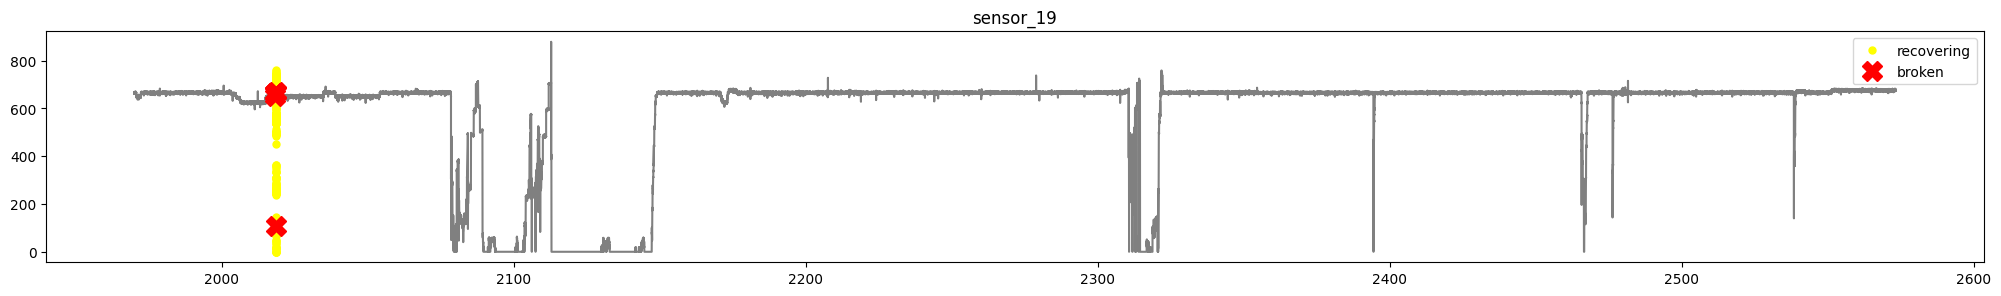

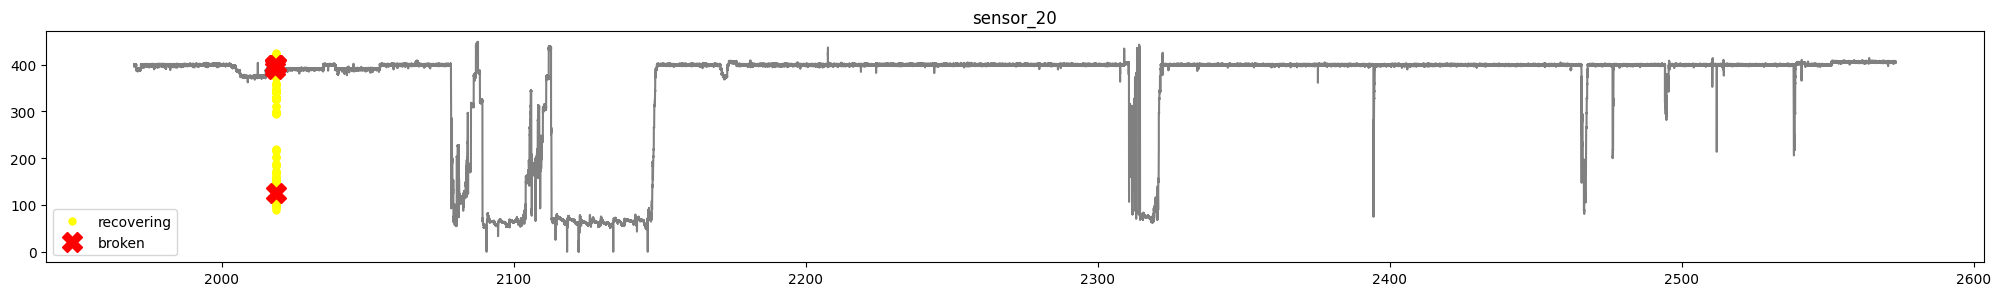

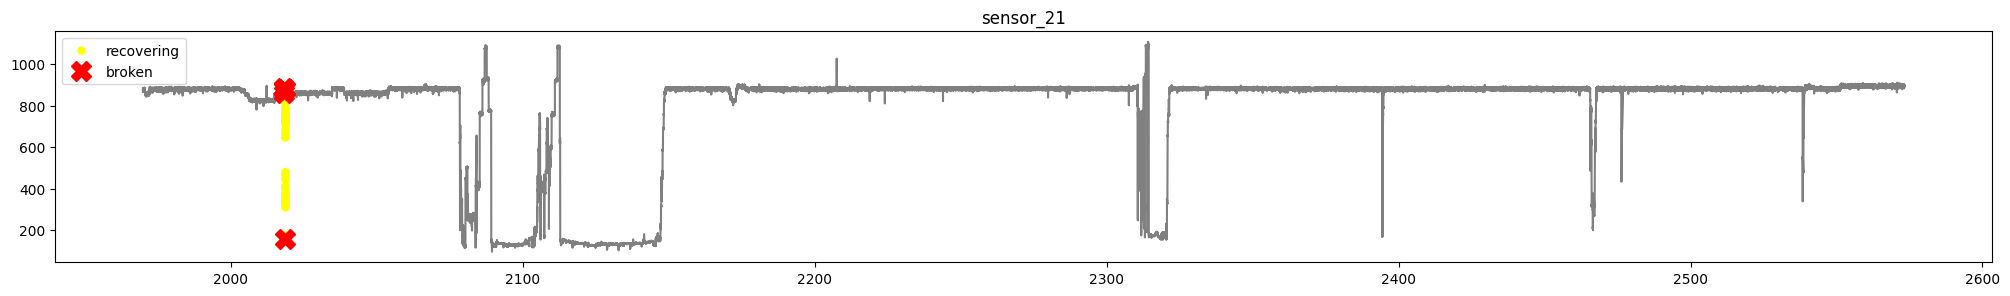

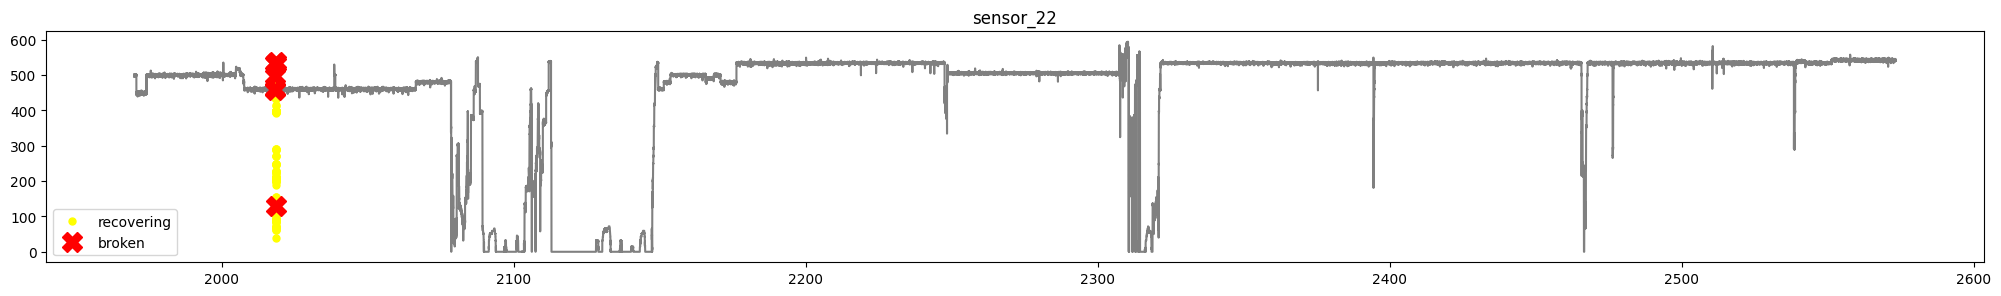

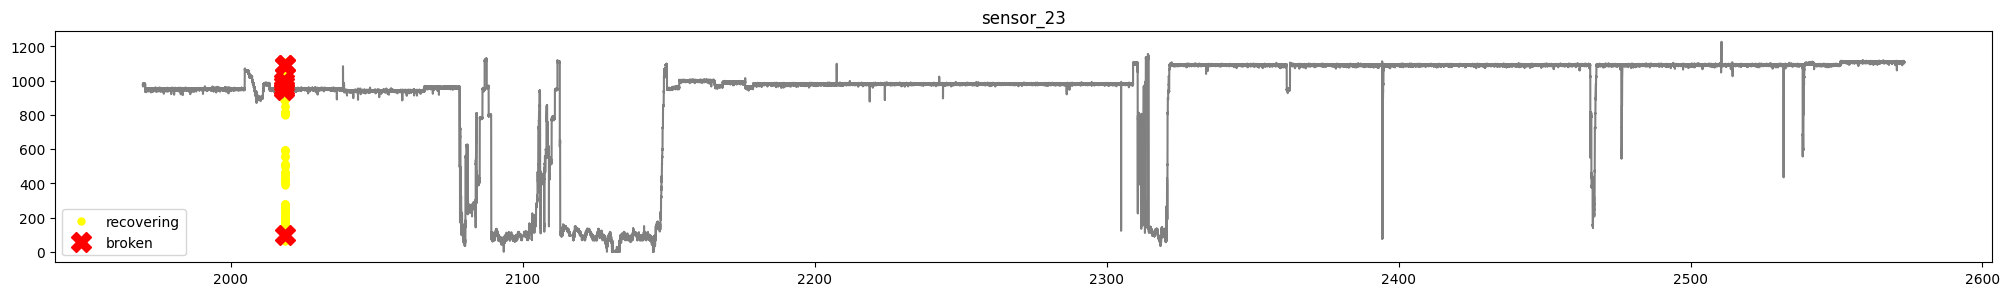

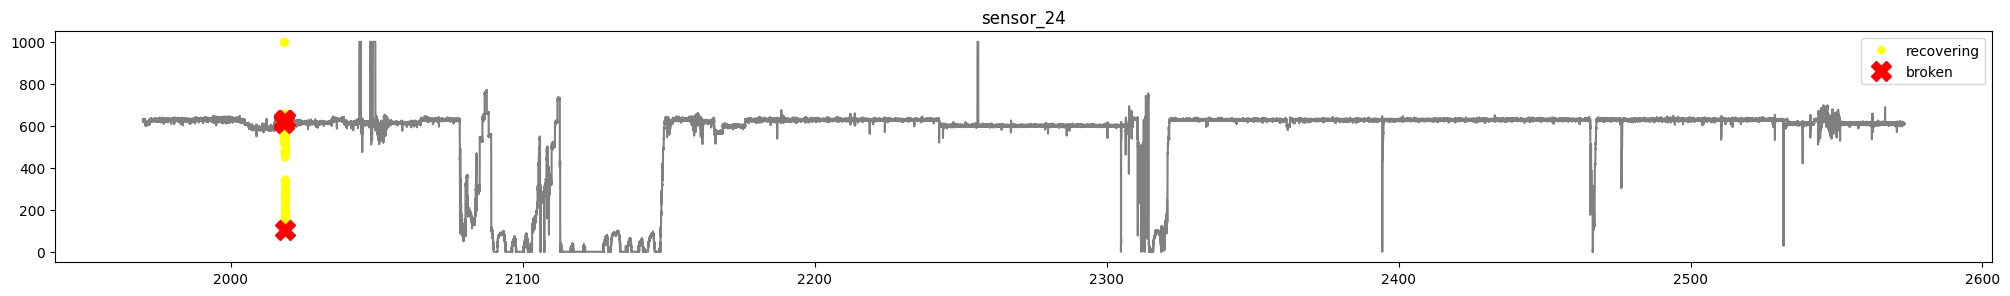

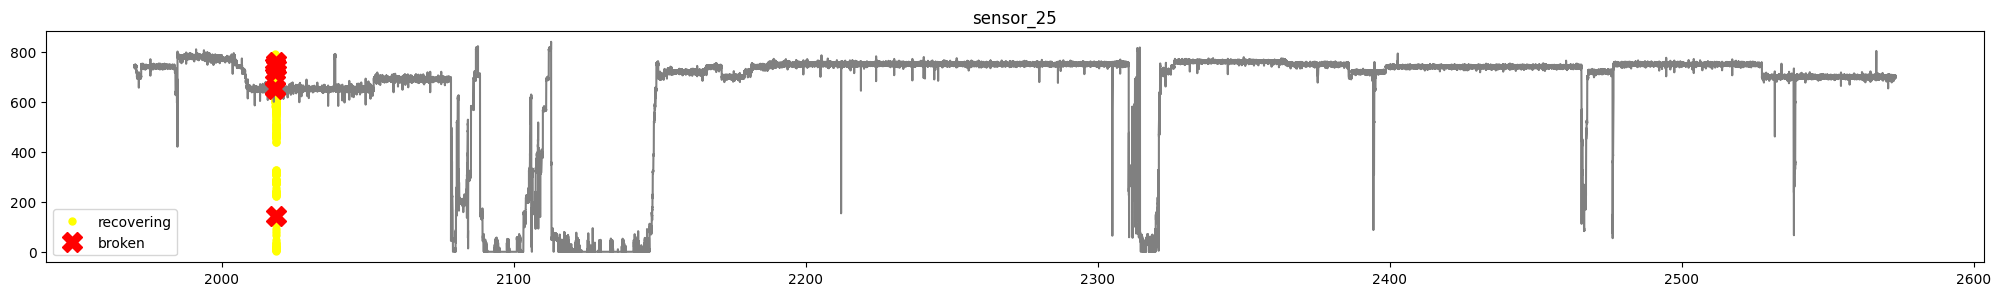

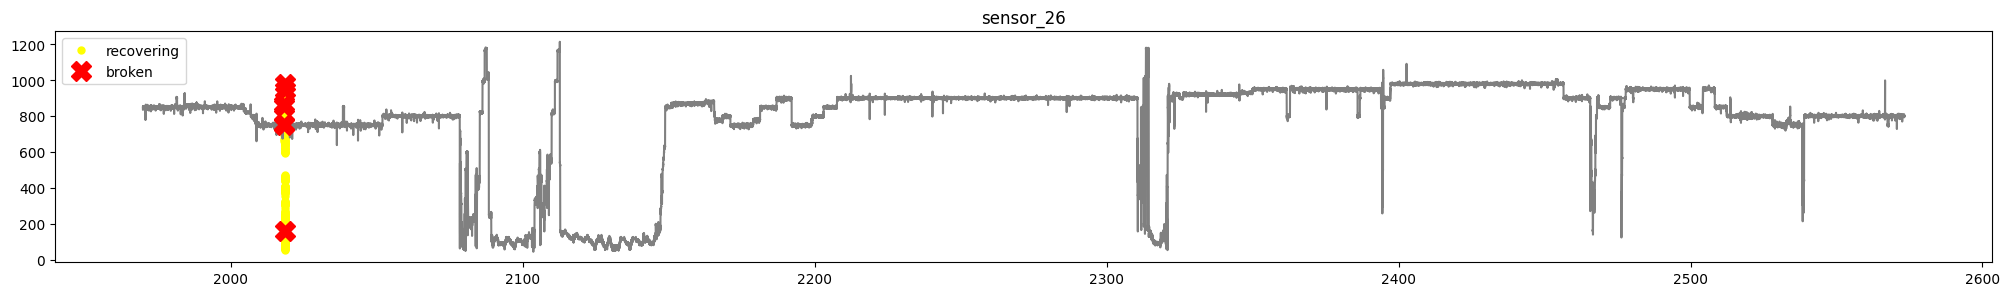

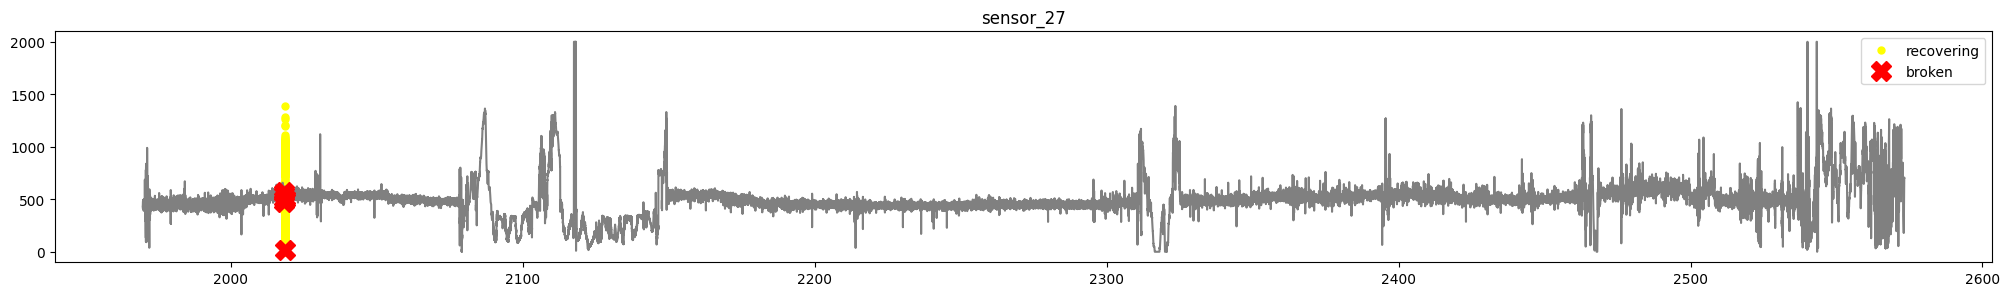

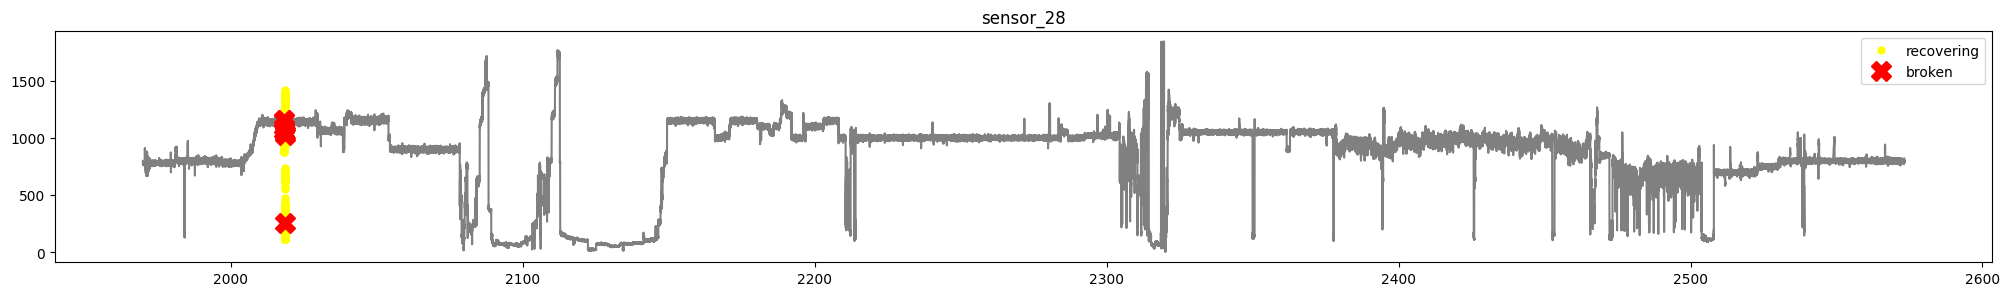

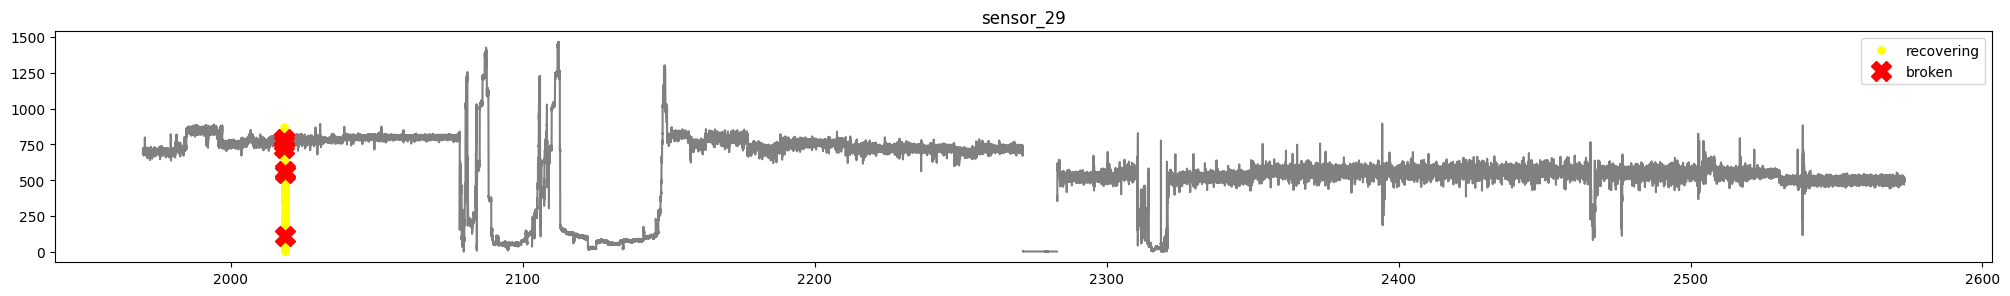

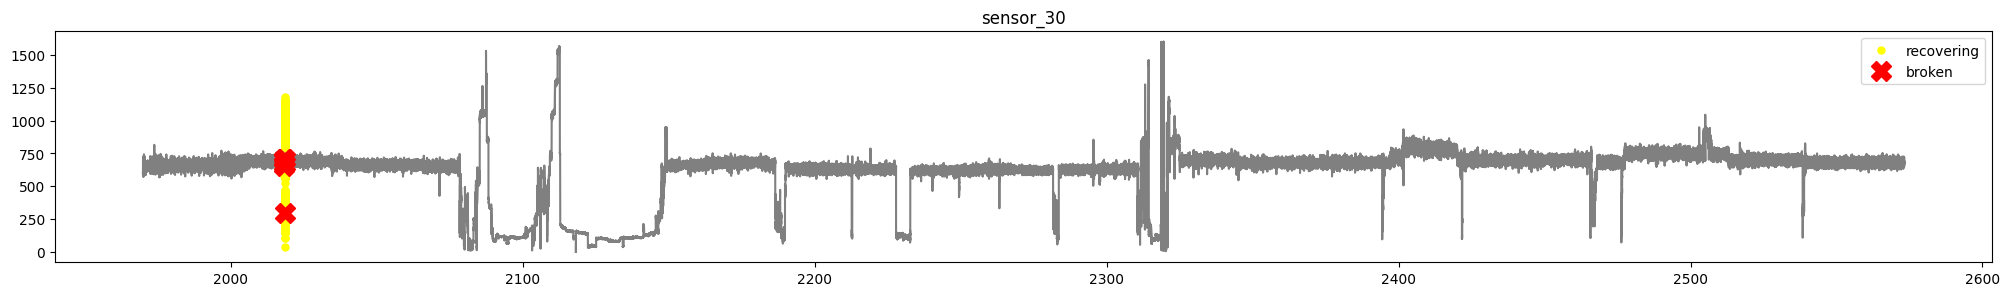

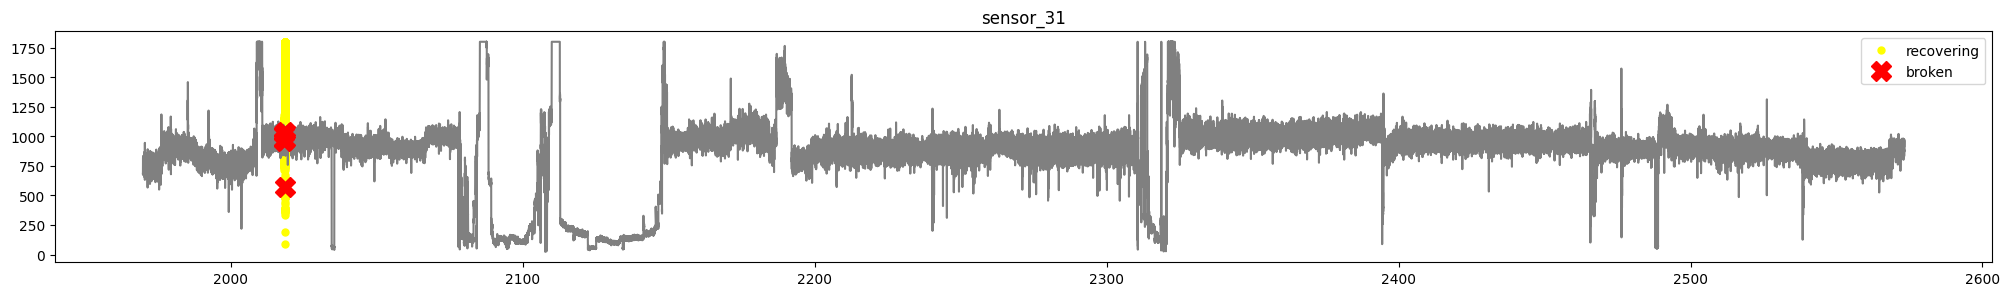

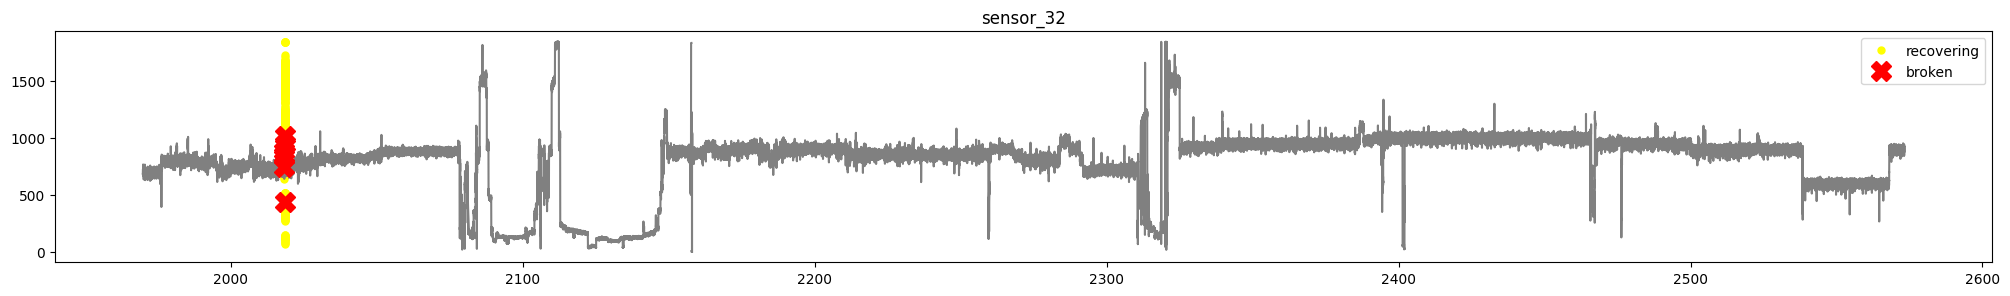

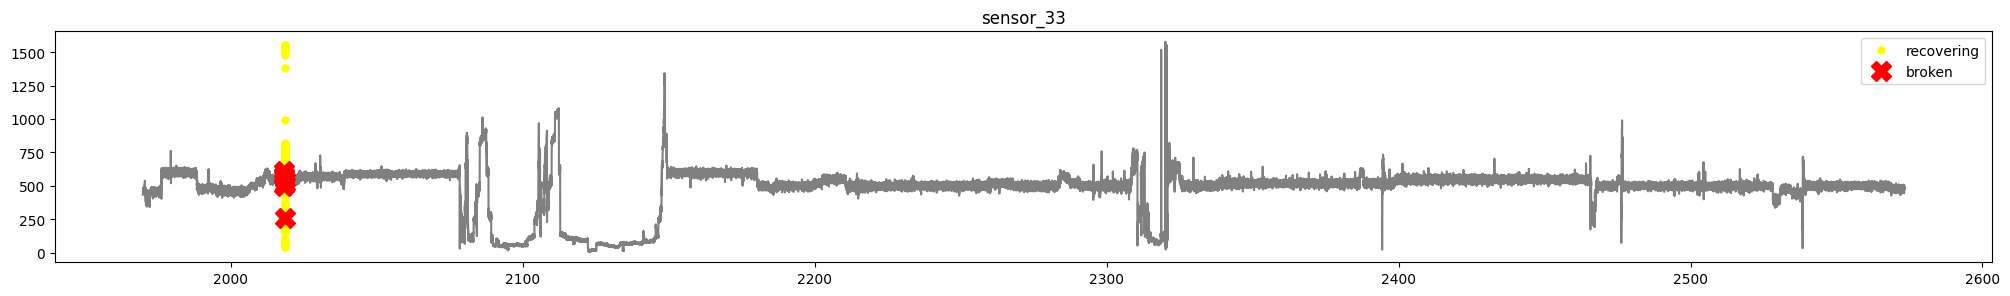

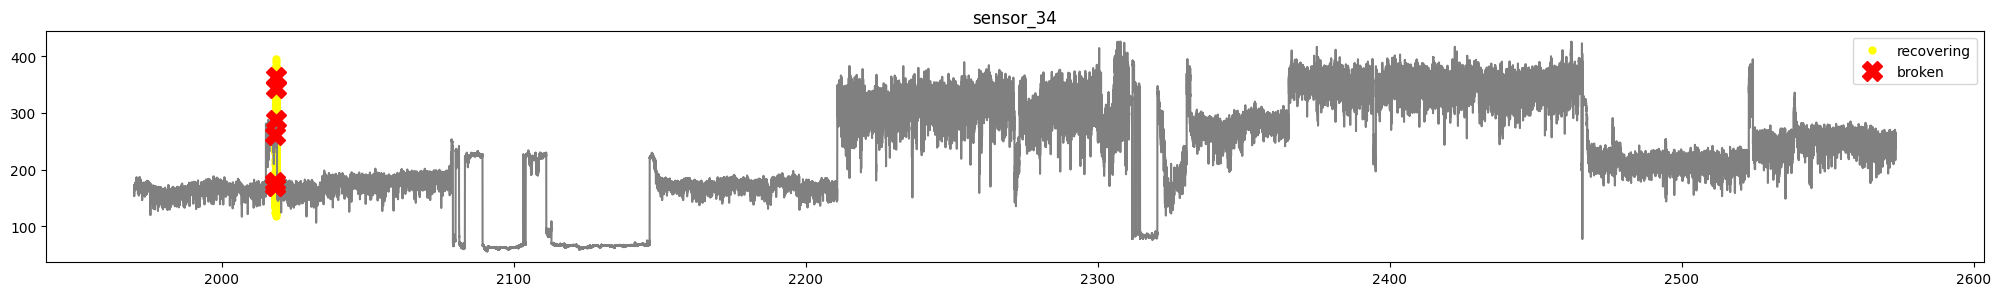

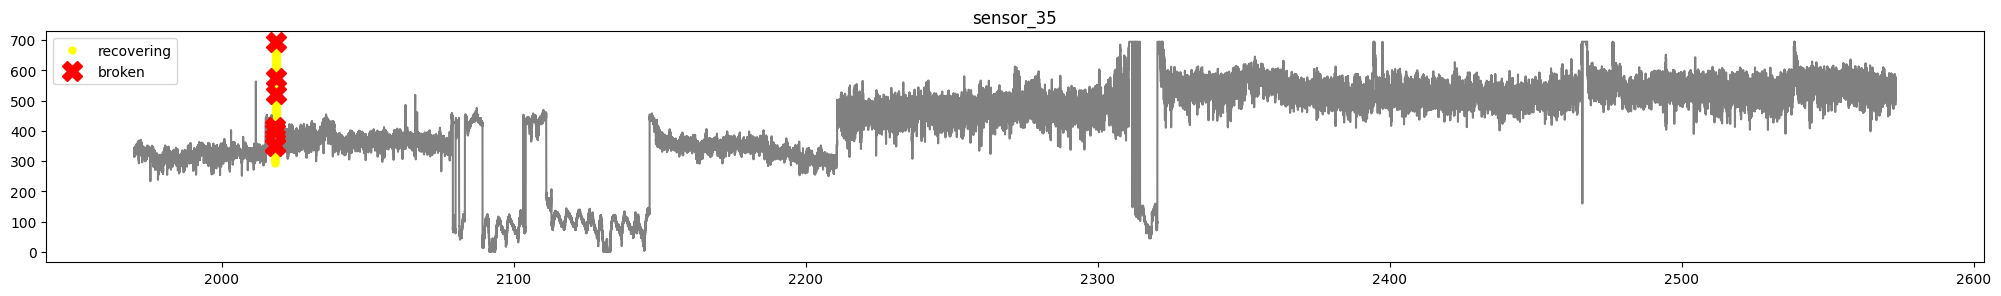

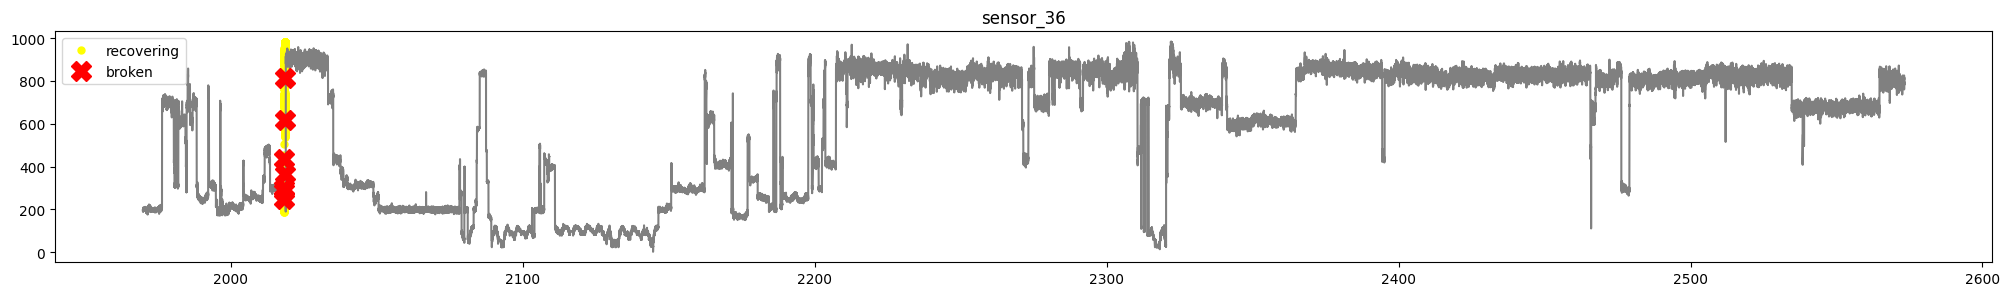

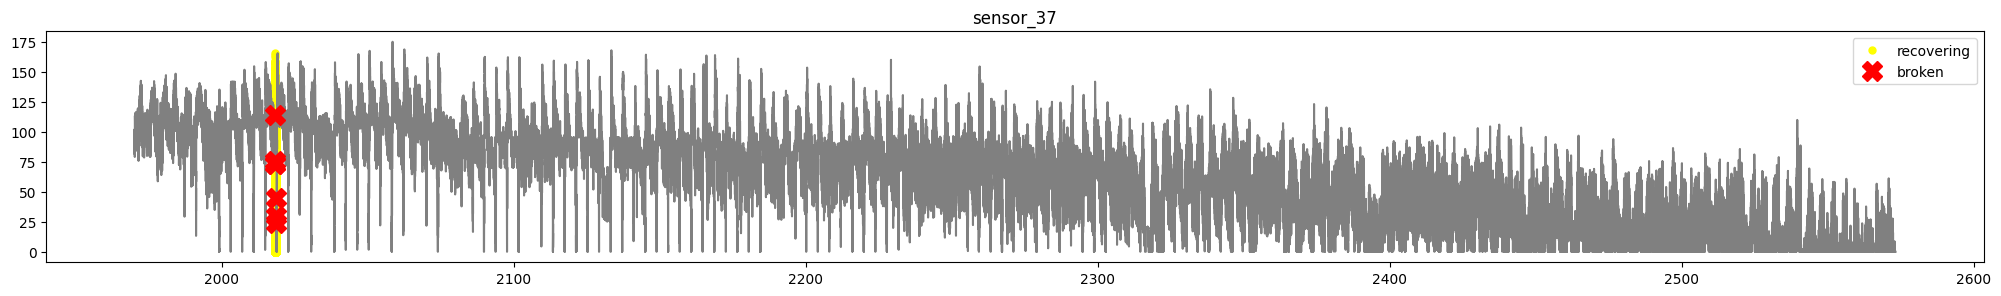

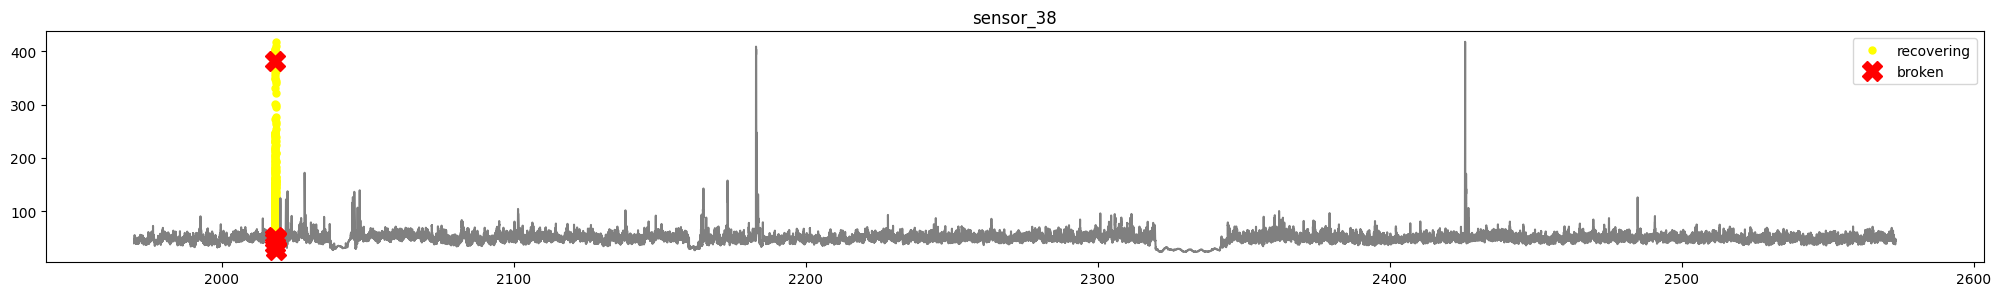

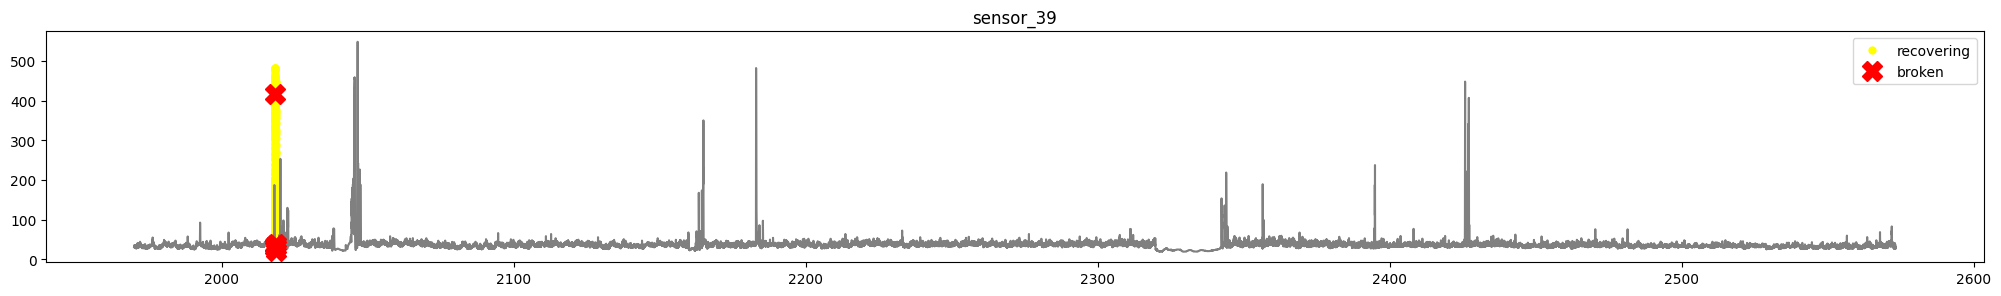

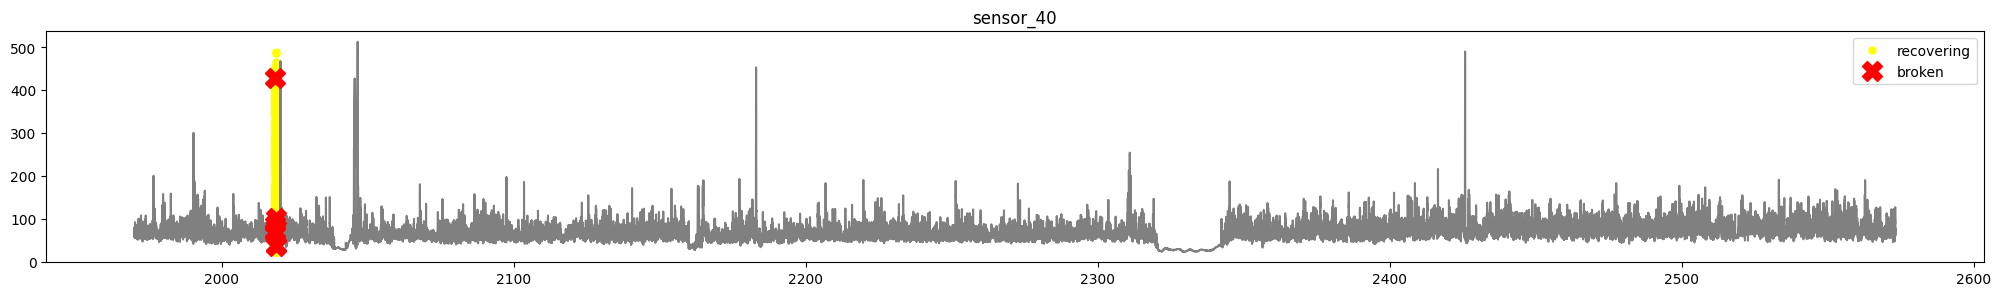

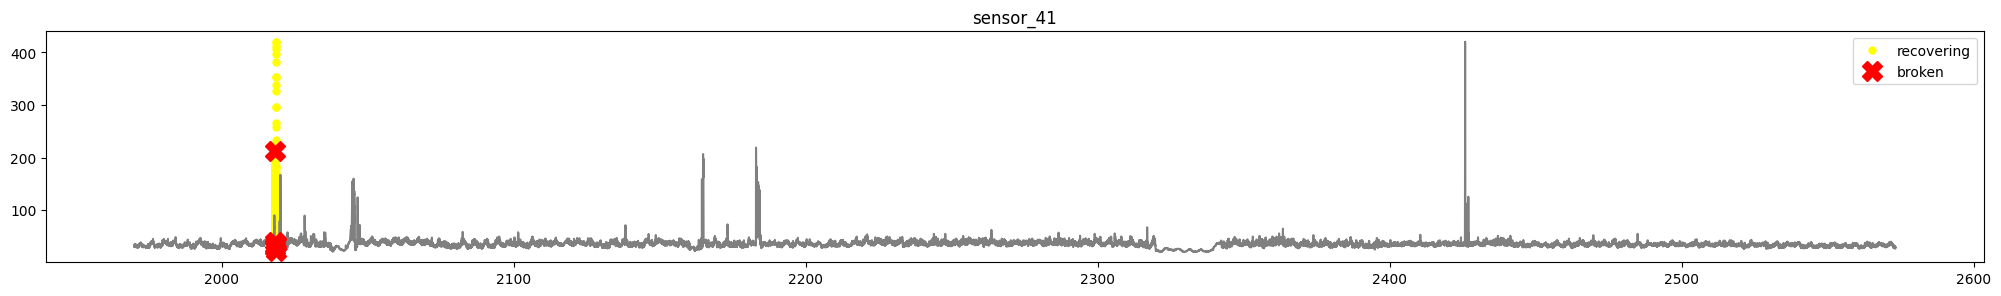

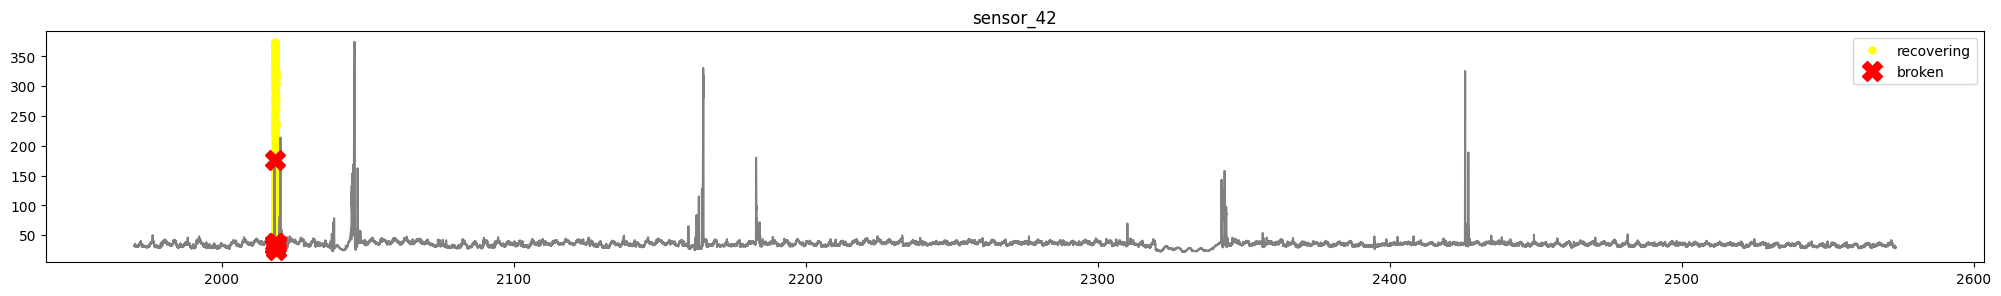

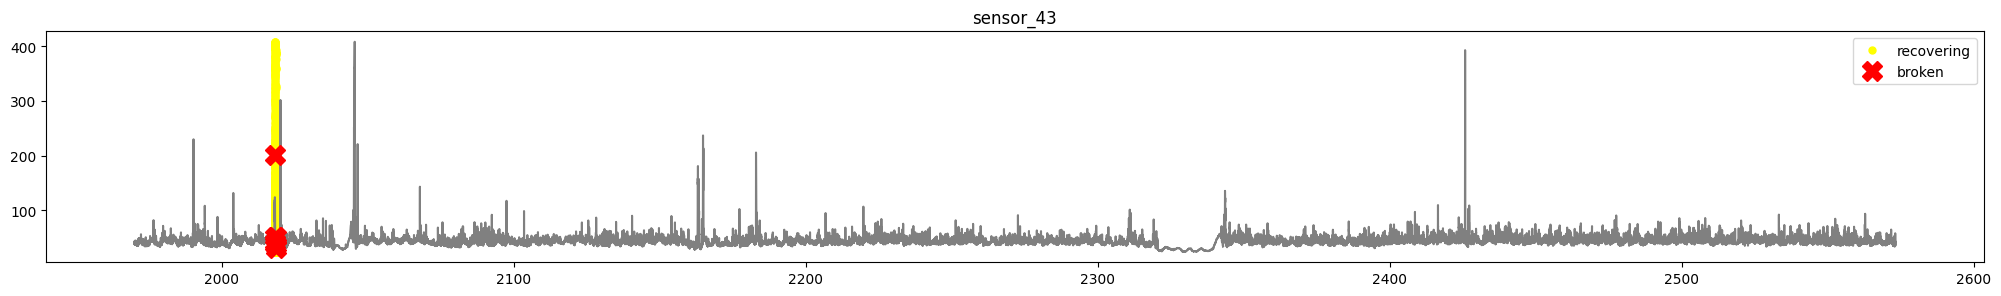

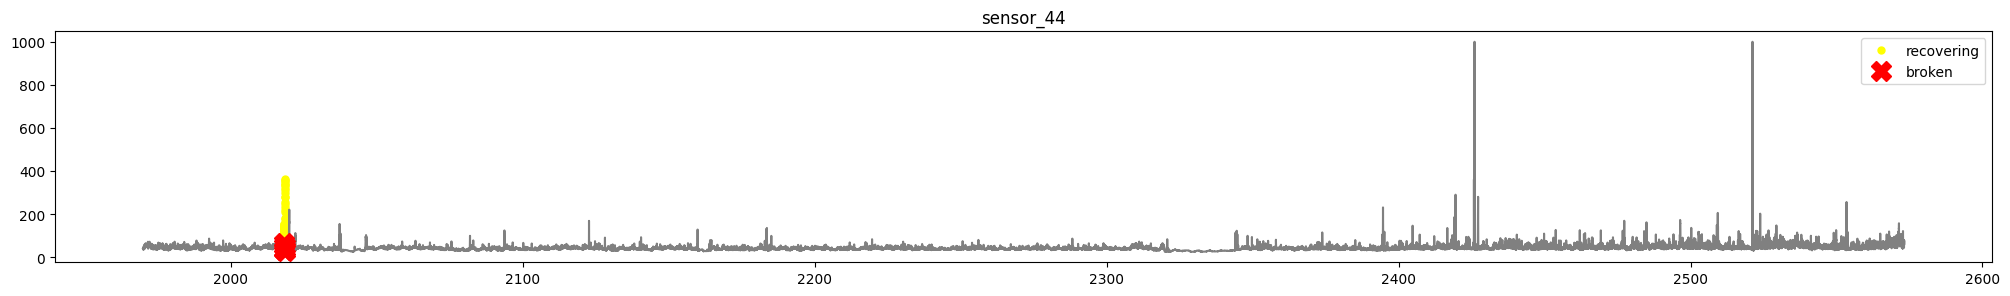

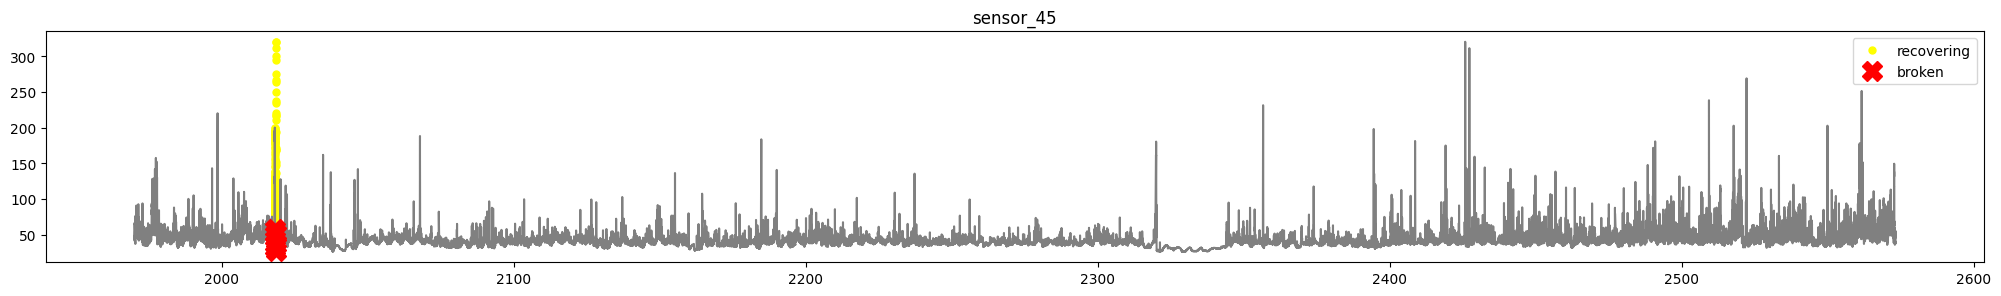

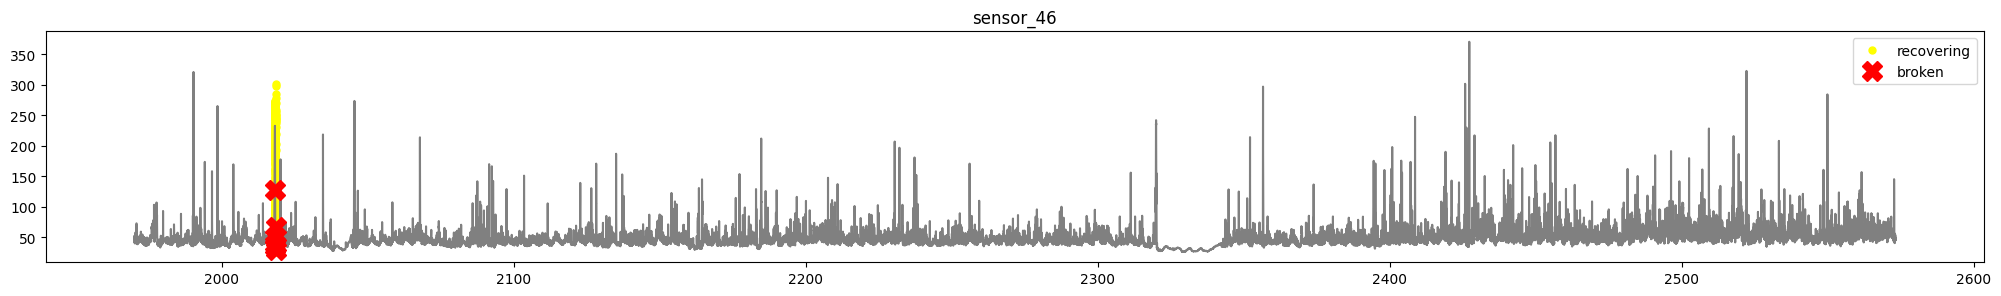

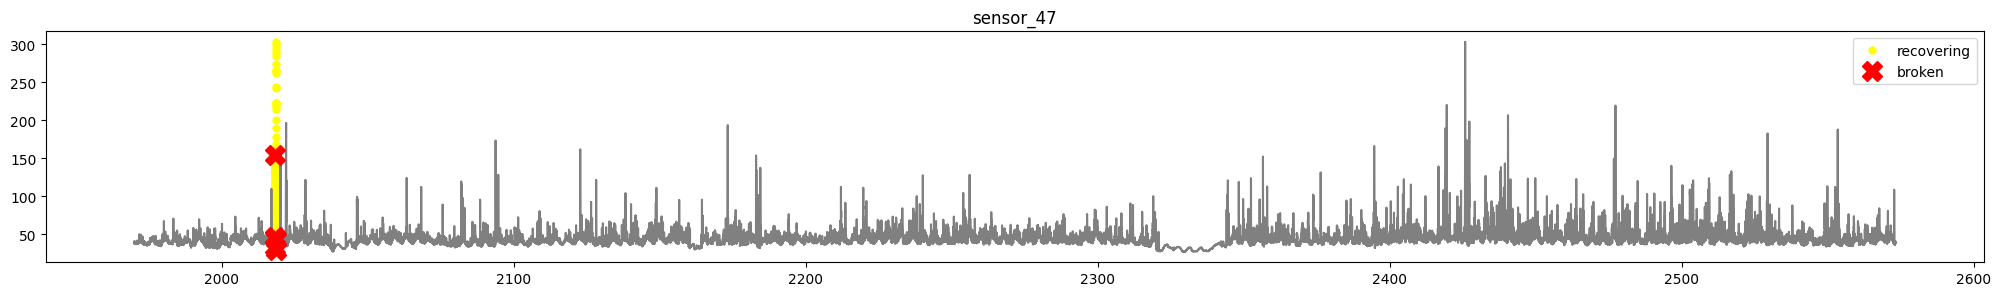

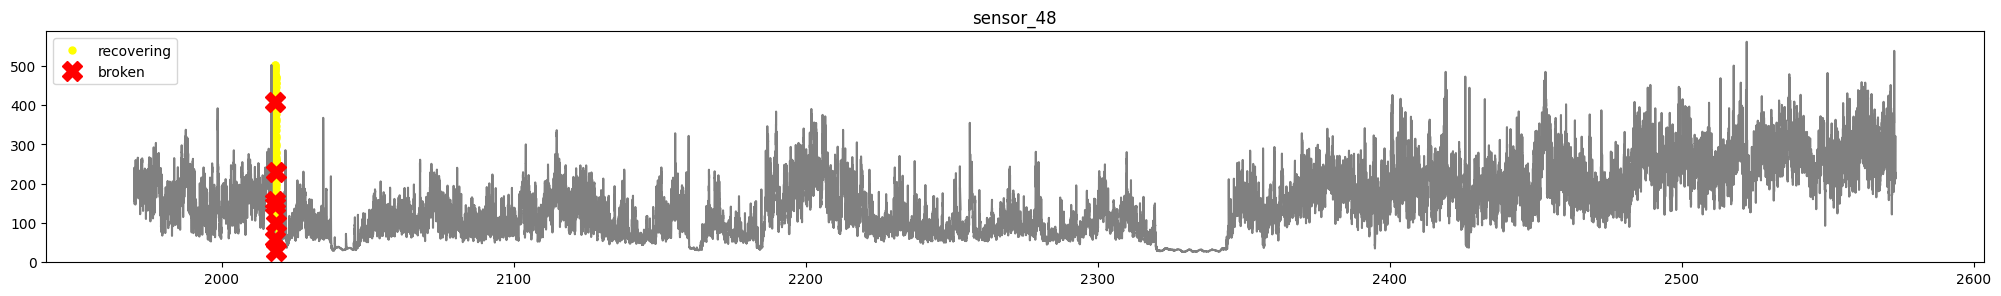

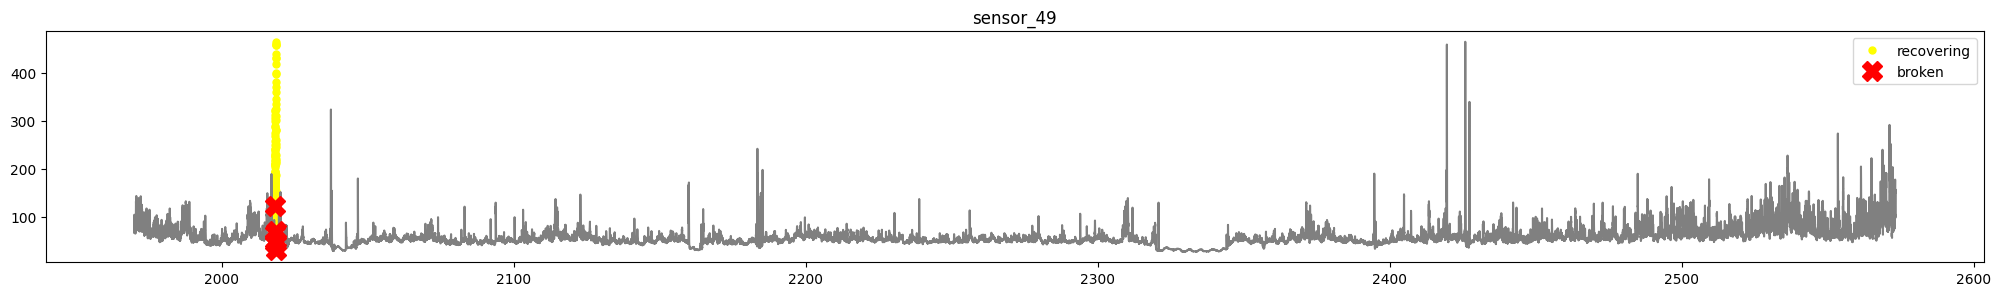

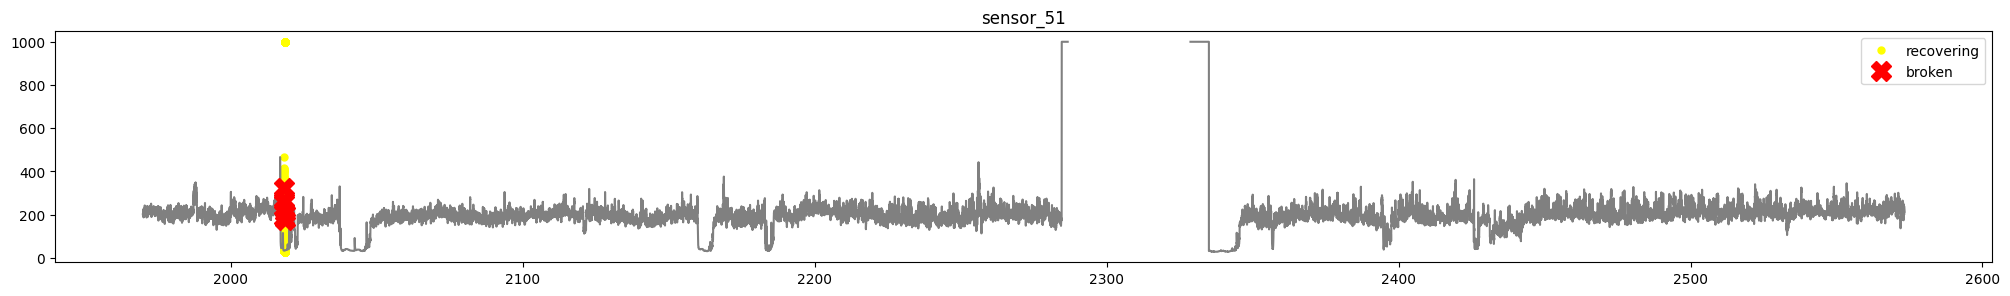

In [ ]:
for c in without_outlier.columns[:-1]:
    plot_sensor(c)

## fitting the model

In [20]:
# Drop the 'machine_status' column from the DataFrame to create the feature matrix X
X = without_outlier.drop(['machine_status'], axis=1)

# Fill missing values in X with the mean of each column

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)




In [24]:

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_scaled = preprocessing.scale(X)




In [ ]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# Calculate the fraction of outliers in the dataset
outliers_fraction = 1 - (len(normal) / len(df))

# Define the anomaly detection algorithms
anomaly_algorithms = [
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, n_jobs=-1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor", LocalOutlierFactor(contamination=outliers_fraction, n_jobs=-1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))
]

# Iterate over the anomaly detection algorithms
for name, algorithm in anomaly_algorithms:
    print(algorithm)

    # Fit the algorithm to the data and predict outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)

    # Store the predicted outliers in the dataframe
    df1[f'{name}'] = y_pred

    print('-' * 100)
    print(f'number of anomalies detected')
    print(df1[f'{name}'].value_counts())
    print('-' * 100)


IsolationForest(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205836
-1     14484
Name: Isolation Forest, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06574074074074077)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205831
-1     14489
Name: One-Class SVM, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205836
-1     14484
Name: Local Outlier Factor, dtype: int64
-------------------------------------------------------

In [ ]:
filename = 'outcome_without_outlier.csv'

# Save the DataFrame 'without_outlier' to a CSV file
without_outlier.to_csv(filename, index=False)


In [ ]:
df = pd.read_csv('outcome_without_outlier.csv')
def plot_sensor_anomolies(sensor, name):
    anomoly = df[df[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(recovery[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly[sensor], linestyle='none', marker='X', color='blue', markersize=4, label='anomoly predicted', alpha = 0.1)
    plot = plt.title(sensor + " (" +name+")")
    plot = plt.legend()
    plt.show()

## comparison between 4 algorithms

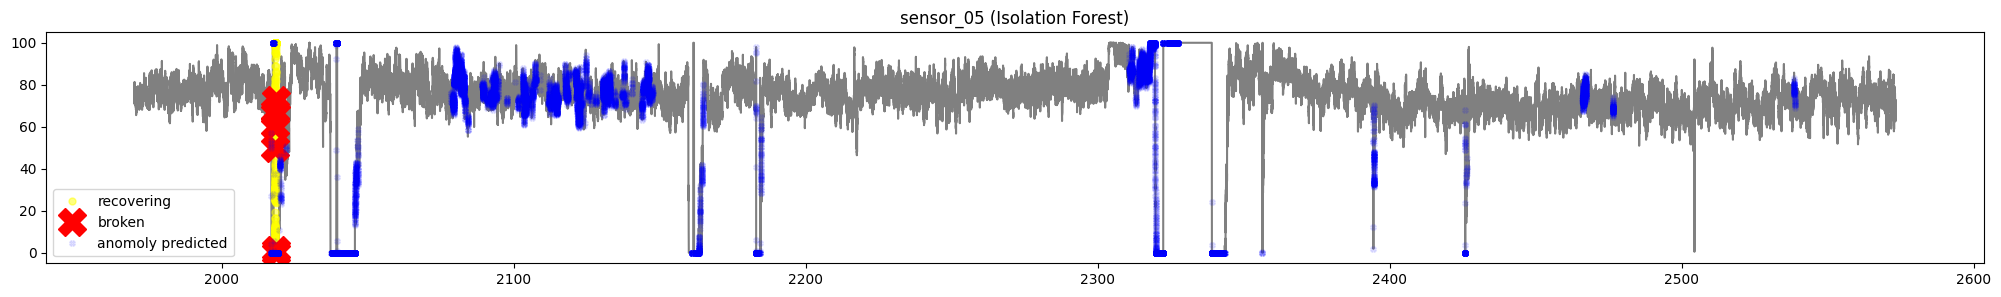

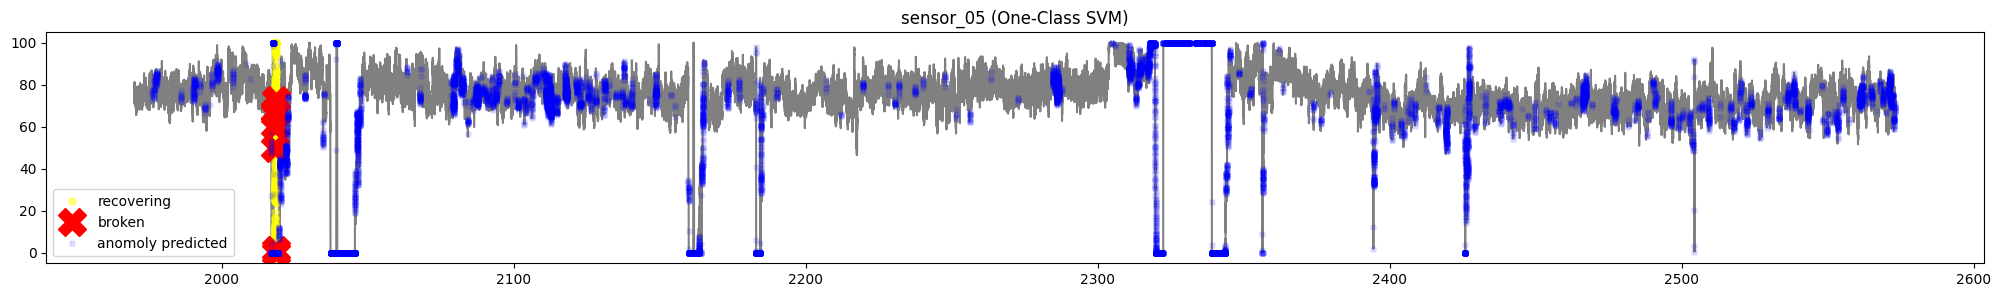

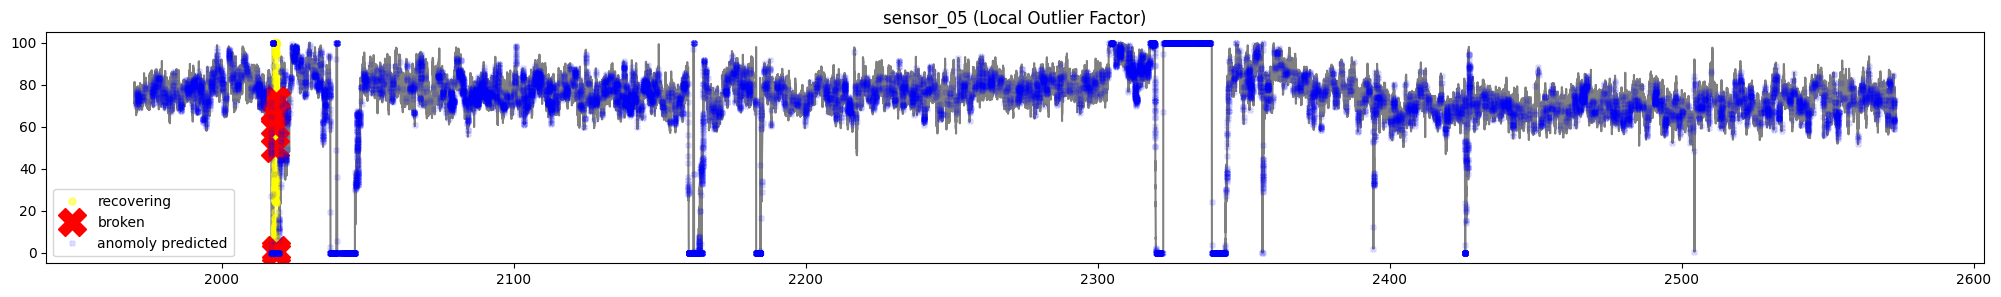

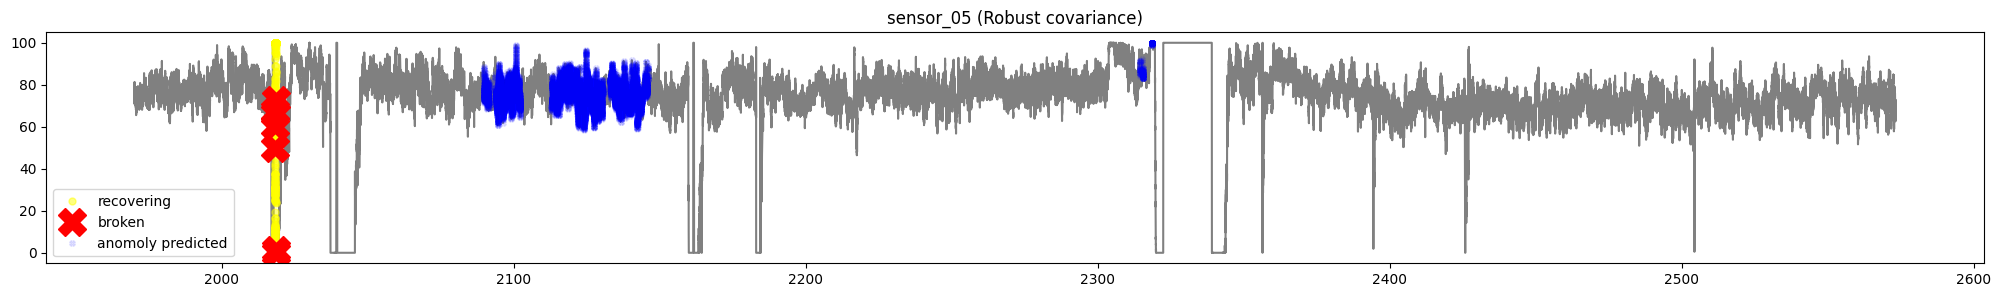

In [ ]:

plot_sensor_anomolies('sensor_05', 'Isolation Forest')
plot_sensor_anomolies('sensor_05', 'One-Class SVM')
plot_sensor_anomolies('sensor_05', 'Local Outlier Factor')
plot_sensor_anomolies('sensor_05', 'Robust covariance')



 **Isolation forest**: The Isolation Forest algorithm operates by partitioning the data space recursively, effectively isolating anomalies more efficiently than normal data points. It takes a dataset with features as input for anomaly analysis. The algorithm constructs multiple isolation trees, each involving random feature and split value selections to divide data points into subspaces. This process is repeated recursively until a specified tree depth is reached or only one point remains in a partition. By calculating the path length to isolate each data point in an isolation tree, the algorithm computes an anomaly score based on aggregated path lengths from all trees. A lower score indicates a higher likelihood of anomaly, reflecting quicker isolation. By setting a threshold, anomaly points can be identified based on scores below that threshold. The algorithm generates a list of anomaly scores for each data point as its output, aiding in potential anomaly detection.Isolation forest predicts anomolies near the broken points but not completly in whole time seriese

**One-Class SVM**: The function of One-Class SVM (Support Vector Machine) is to perform outlier detection by separating the majority of normal data points from potential anomalies in a dataset. It constructs a boundary, or hyperplane, around the normal data points, aiming to encapsulate them while maximizing the margin from the boundary to the nearest data points. Anomalies lying outside this boundary are considered outliers. One-Class SVM is particularly useful when dealing with skewed datasets where anomalies are rare compared to normal instances. It learns the optimal hyperplane through the support vectors that define the boundary, and its decision function assigns scores to data points based on their proximity to the boundary. This allows the algorithm to identify anomalies as data points with lower scores, implying they are distant from the established normality boundary.the result of One-Class SVM was good and predicts anomolies better.

**Local Outlier Factor**:LOF considers the local context of each data point to detect anomalies. Points that have significantly lower local densities than their neighbors are identified as outliers. LOF can capture anomalies in datasets with varying densities and complex structures, making it effective for detecting anomalies in various real-world scenarios.the results of this algorithm is not good.

**Robust covariance**: Robust covariance functions are statistical techniques designed to calculate covariance matrices that are less influenced by outliers or anomalies in the data. By using robust statistical measures, these methods provide more accurate estimates of covariance while reducing the impact of extreme values. This is especially important in situations where data may contain noise or outliers that can distort traditional covariance calculations, allowing for more reliable assessment of underlying relationships and patterns within the data.the result was not good because could not detect anomaly well.

References:
1. https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#:~:text=The%20Local%20Outlier%20Factor%20(LOF,lower%20density%20than%20their%20neighbors.
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
3. https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af

### outliers handling

In [ ]:
# Drop the 'machine_status' column from the DataFrame
X = with_outlier.drop(['machine_status'], axis=1)

# Fill missing values with the mean of each column
X = X.fillna(X.mean())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features in X using StandardScaler
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Define the desired fraction of outliers in the data
outliers_fraction = 0.06

# Define a list of anomaly detection algorithms along with their parameters
anomaly_algorithms = [
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, n_jobs=-1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor", LocalOutlierFactor(contamination=outliers_fraction, n_jobs=-1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))
]


for name, algorithm in anomaly_algorithms:
    # Print the algorithm name
    print(algorithm)

    # Fit the algorithm and make predictions
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)
    
    # Add the predictions to the dataframe
    df2[f'{name}'] = y_pred

    # Print the number of anomalies detected
    print('-'*100)
    print(f'Number of anomalies detected:')
    print(df2[f'{name}'].value_counts())
    print('-'*100)


IsolationForest(contamination=0.06, n_jobs=-1)


c:\Users\Mehdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    16745
-1     1069
Name: Isolation Forest, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    16743
-1     1071
Name: One-Class SVM, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    16745
-1     1069
Name: Local Outlier Factor, dtype: int64
----------------------------------------------------------------------------------------------------
EllipticEnvelope(contamination=0.06)
---------------

In [ ]:
filename = 'outcome_with_outlier.csv'
with_outlier.to_csv(filename, index=False)
df = pd.read_csv('outcome_with_outlier.csv')

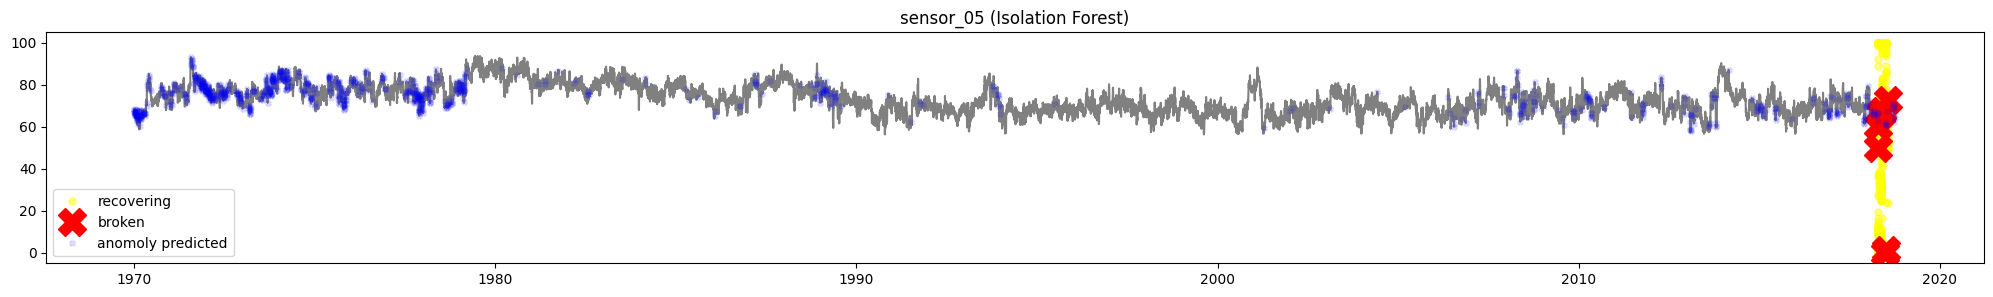

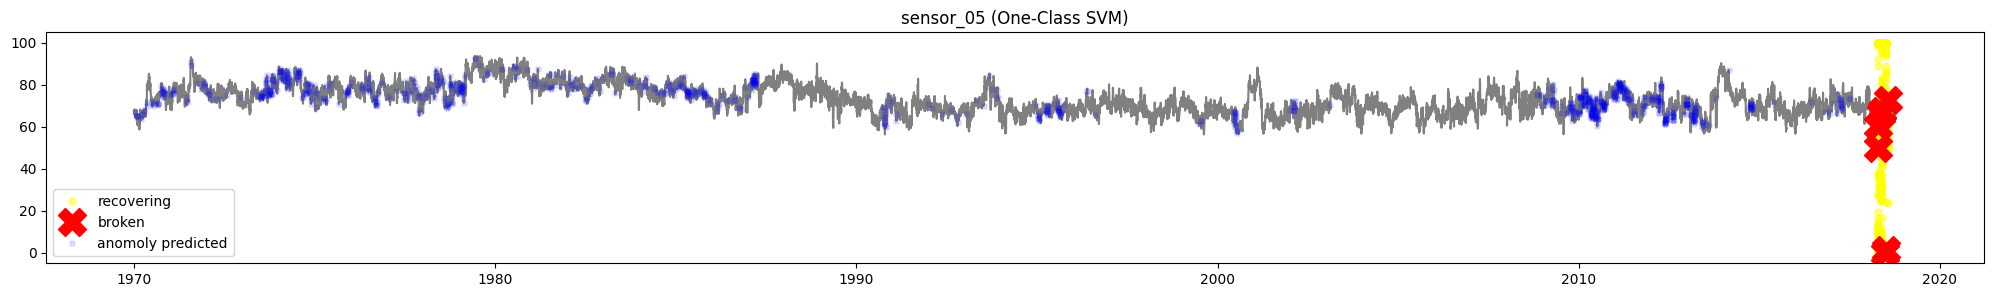

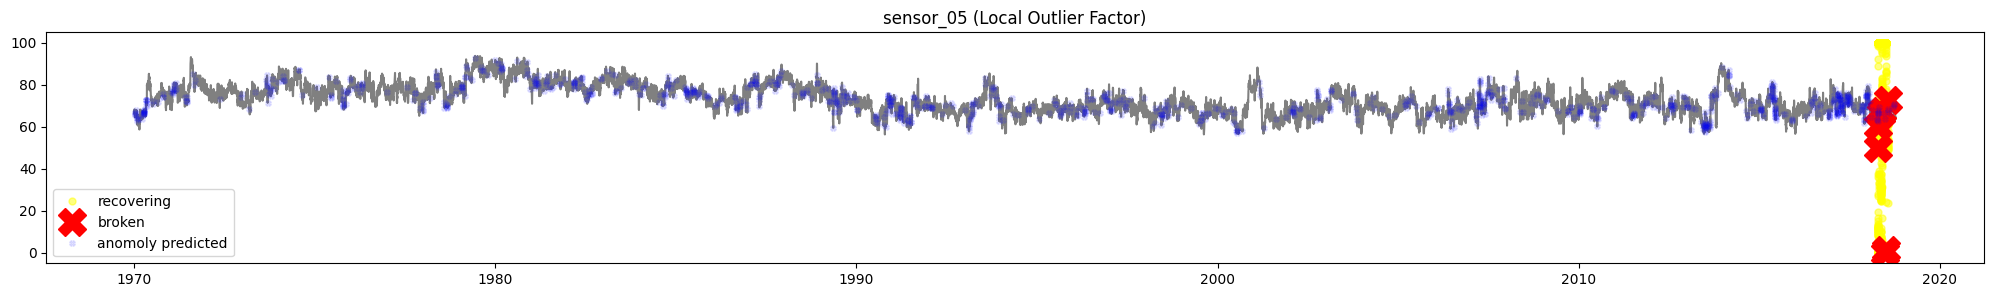

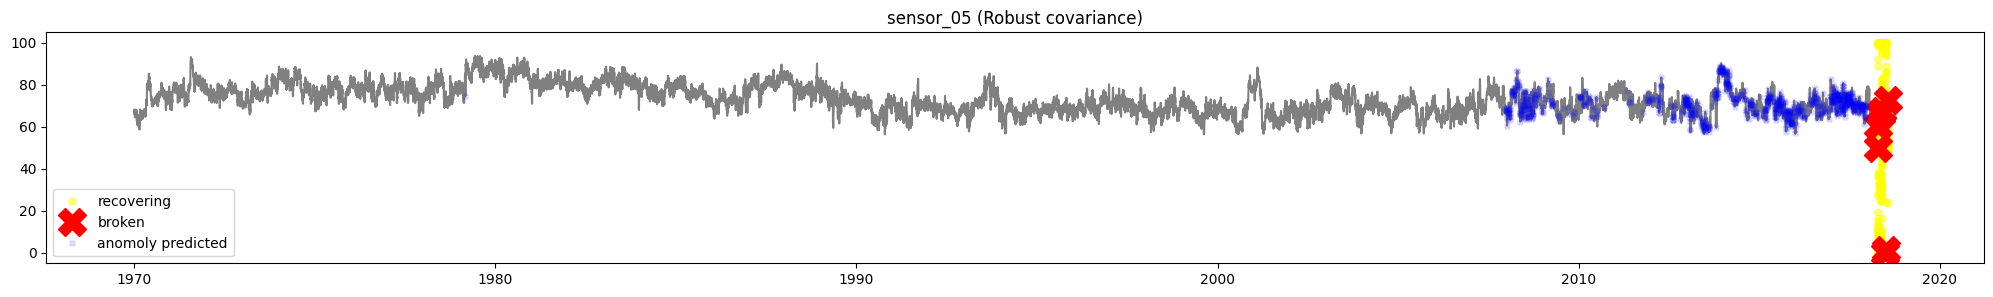

In [ ]:
plot_sensor_anomolies('sensor_05', 'Isolation Forest')
plot_sensor_anomolies('sensor_05', 'One-Class SVM')
plot_sensor_anomolies('sensor_05', 'Local Outlier Factor')
plot_sensor_anomolies('sensor_05', 'Robust covariance')

In [ ]:
# Create the feature matrix X by dropping the 'machine_status' column from 'without_outlier'
X = without_outlier.drop(['machine_status'], axis=1)

# Fill missing values in X with the mean of each column
X = X.fillna(X.mean())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features in X using StandardScaler
X = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


dbscan = DBSCAN(algorithm='auto',eps=0.8,metric='euclidean', min_samples=3)

y_pred = dbscan.fit_predict(X)

df1['DBSCAN'] = y_pred
print('-'*100)
print(f'number of anomolies detected')
print(df1['DBSCAN'].value_counts())
print('-'*100)

----------------------------------------------------------------------------------------------------
number of anomolies detected
-1       11636
 559      8089
 1308     7554
 691      3552
 2172     1870
         ...  
 2246        3
 1048        3
 1049        3
 4481        3
 4350        3
Name: DBSCAN, Length: 5780, dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
filename = 'outcome_DBSCAN.csv'

# Save the DataFrame 'without_outlier' to a CSV file
without_outlier.to_csv(filename, index=False)


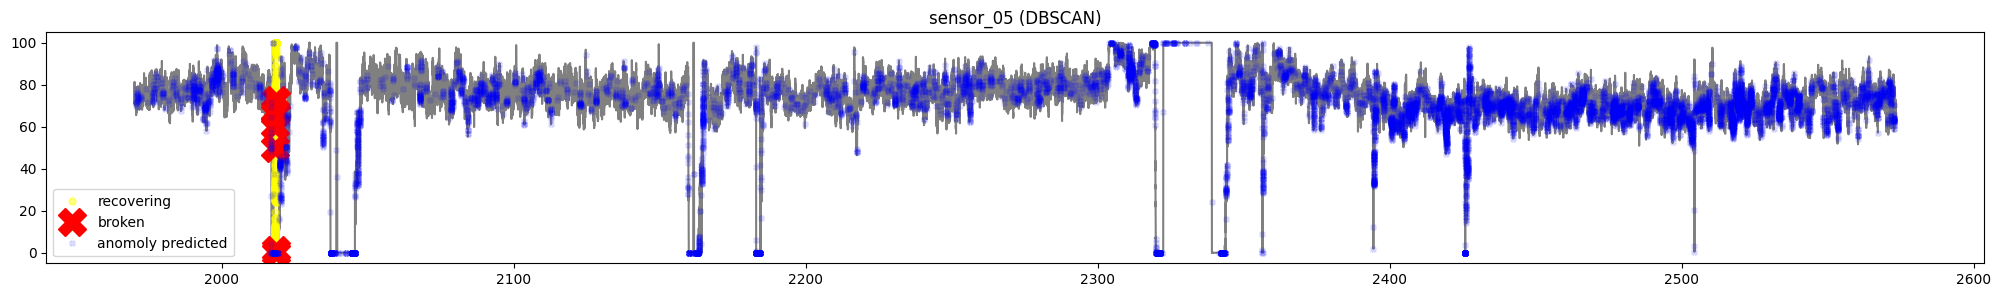

In [ ]:

df = pd.read_csv('outcome_DBSCAN.csv')
plot_sensor_anomolies('sensor_05', 'DBSCAN')